Global Power Plant Database
Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Hint : Use pandas methods to combine all the datasets and then start working on this project.


Dataset Link-
https://github.com/dsrscientist/dataset3/blob/main/global_Power_plant_database.csv 



In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import zscore
from sklearn.svm import SVR
import os
import joblib
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#Retrieve data from the given dataset
url="https://raw.githubusercontent.com/dsrscientist/dataset3/refs/heads/main/global_Power_plant_database.csv"
df=pd.read_csv(url)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Exploratory Data Analysis
#DataView
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [4]:
df.shape

(908, 25)

In [5]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

This dataset contains 908 rows and 25 columns. Out of which the variables "capacity_mw" and "primary_fuel" are considered as targets for different approaches, the remaining 23 are independent variables described in the above result.

Since the dataset can be seen from two angles to find the "primary_fuel"(Classification problem) and the "capacity_mw" (Regression Problem) we are going to analyze them as target variables during the EDA.

In [6]:
#Checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

There are two types of data present in the datatype, object and float64.
Objects (strings): country, country_long, name, gppd_idnr, primary_fuel, other_fuel1, other_fuel2, owner, source, url, geolocation_source, generation_data_source

float64 (numeric): capacity_mw, latitude, longitude, other_fuel3, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, estimated_generation_gwh

The dataset presents null values.

In [13]:
#Missing Values
missing_values=df.isnull().sum().to_frame("Null Values")

# Calculate the % of the null values
missing_values["% of missing"] = round(missing_values["Null Values"] / len(df) * 100,2)

missing_values

,Null Values,% of missing
country,0,0.00
country_long,0,0.00
name,0,0.00
gppd_idnr,0,0.00
capacity_mw,0,0.00
latitude,46,5.07
longitude,46,5.07
primary_fuel,0,0.00
other_fuel1,709,78.08
other_fuel2,907,99.89


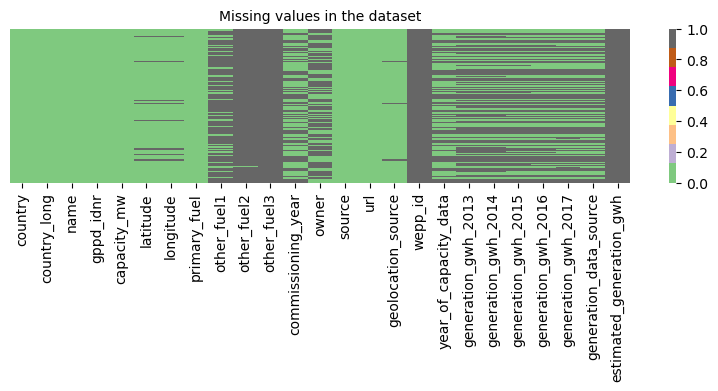

In [11]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

Some columns present null values, in few columns we can see no values are present as such in columns wepp_id, other_fuel1,other_fuel3 and estimated_generation_gwh. So we can drop this columns because if we try to fill up the values, then the prediction would be affected. Rest of the columns which has few null values has to be taken care off one by one.

In [15]:
#Dropping columns with high null values as mentioned in the above comment
df.drop(['wepp_id','other_fuel2','other_fuel3','estimated_generation_gwh'],axis=1,inplace=True)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [16]:
#We can analyse the other_fuel1 variable since it holds 78% of the Nan Values, lets analyse and decide about to holdor drop it.
df.other_fuel1.value_counts(dropna=False)

other_fuel1
NaN             709
Oil             196
Gas               2
Cogeneration      1
Name: count, dtype: int64

We can see other_feul1 is a categorical variable with three types of input variables, out of which oil count is more, if we try to impute null values with oil as input , we would be getting a imbalanced dataset for this category, so it is better to drop this column.

In [18]:
#Lets analyse our next columns owner since it holds about 62%
df.owner.value_counts(dropna=False)

owner
NaN                                                            566
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Sterling Agro Industries ltd.                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: count, Length: 281, dtype: int64

We can see even this column has about 566 values which are null and if we try to fill it up, it might not be helping in getting a good prediction model, moreover its not going to hold positive relationship with the target variables. So lets go ahead and drop the owner column also. 

In [19]:
#Dropping other-fuel1 and owner columns
df.drop(['other_fuel1','owner'],axis=1,inplace=True)
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source'],
      dtype='object')

In [23]:
#lets see the missing values after the column drops
missing_values=df.isnull().sum().to_frame("Null Values")
missing_values


,Null Values
country,0
country_long,0
name,0
gppd_idnr,0
capacity_mw,0
latitude,46
longitude,46
primary_fuel,0
commissioning_year,380
source,0


In [24]:
df.shape

(908, 19)

In [25]:
#Feature Analysis
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df


,No. of unique values,type
country,1,object
country_long,1,object
name,908,object
gppd_idnr,908,object
capacity_mw,365,float64
latitude,837,float64
longitude,828,float64
primary_fuel,8,object
commissioning_year,73,float64
source,191,object


About the number of unique values:

There are variables with just 1 unique value like country, country_long, year_of_capacity_data, and generation_data_source, they do not contribute with valuable data for the prediction model since all the rows have the same value. Therefore we will drop them.

The variables name and gdpd_idnr have the same unique values as the dataset rows, these columns only serves to identify each record but doesn't influence the target variable. Therefore we can drop them.

primary_fuel is the target variable for the classification task and has 8 unique values of 908 total in the dataset, therefore we can confirm we are facing a classification problem.

capacity_mw is the other target variable with 357 unique values of 908 total in the dataset. We are facing a regression problem since the target variable is continuous and numerical.

In [26]:
#Primary Fuel Variable
# Inspect the unique values of the target variable
column = 'primary_fuel'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")
print(f"# unique values: {df[column].nunique()}\n")

Feature primary_fuel:
primary_fuel
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: count, dtype: int64
Unique values: ['Biomass', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar', 'Wind']
# unique values: 8



We can observe that primary fuel has 8 unique values out of 908, it seems to be imbalanced data. 
We should be building a classification model. 

In [27]:
# Analyse the unique values of the target variable
column = 'capacity_mw'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"# unique values: {df[column].nunique()}\n")

Feature capacity_mw:
capacity_mw
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: count, Length: 365, dtype: int64
# unique values: 365



We can observe that capacity_mw has 365 unique values out of 908. We will go ahead with regression model.

We can observe from the unique value result that few columns has 1 has unique values. 
These columns can be dropped, they are country, country_long, year_of_capacity_data, generation_data_source.
We can also observe that name column doesnt contribute for the prediction model. 

In [33]:
#Dropping the above mentioned columns
df.drop(['country', 'country_long', 'year_of_capacity_data', 'generation_data_source'],axis=1,inplace=True)
df.drop(['name'],axis=1,inplace=True)
df.shape

(908, 14)

In [34]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df.columns:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: {categorical_col}")
print(f"Numerical Columns: {numerical_col}")

Categorical Columns: ['gppd_idnr', 'primary_fuel', 'source', 'url', 'geolocation_source']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']


In [35]:
# First we are going to remove the target variable which has already been analyzed
categorical_col.remove('primary_fuel')
categorical_col

['gppd_idnr', 'source', 'url', 'geolocation_source']

In [36]:
for column in categorical_col:
    print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature gppd_idnr:
gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: count, Length: 908, dtype: int64
# unique values: 908

Feature source:
source
Central Electricity Authority                                  520
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                  

In [37]:
# we are going to remove the target variable which has already been analyzed
numerical_col.remove('capacity_mw')
numerical_col

['latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [38]:
for column in numerical_col:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature latitude:
latitude
19.0004    3
24.1917    3
14.2352    2
16.5697    2
15.1839    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: count, Length: 837, dtype: int64
# unique values: 837

Feature longitude:
longitude
71.6917    4
71.6918    3
72.8983    3
81.2875    3
75.8988    3
          ..
72.7629    1
70.3961    1
74.2393    1
77.0435    1
77.4768    1
Name: count, Length: 828, dtype: int64
# unique values: 828

Feature commissioning_year:
commissioning_year
2013.0    28
2015.0    26
2012.0    23
2016.0    21
2010.0    17
          ..
1946.0     1
1956.0     1
1937.0     1
1959.0     1
1953.0     1
Name: count, Length: 73, dtype: int64
# unique values: 73

Feature generation_gwh_2013:
generation_gwh_2013
0.000000       21
631.777928      1
605.533700      1
8801.420000     1
507.897750      1
               ..
2630.113350     1
2999.023000     1
246.421700      1
2942.810000     1
20.900000       1
Name: count, Length: 364, dtype: int64
#

In [39]:
# Reviewing the missing values in the remaining data
missing_values = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_values["% of missing"] = round(missing_values['Null values'] / len(df) * 100,2)

missing_values = missing_values[missing_values['Null values'] > 0]
missing_values

,Null values,% of missing
latitude,46,5.07
longitude,46,5.07
commissioning_year,380,41.85
geolocation_source,19,2.09
generation_gwh_2013,524,57.71
generation_gwh_2014,507,55.84
generation_gwh_2015,483,53.19
generation_gwh_2016,471,51.87
generation_gwh_2017,465,51.21


As we can see there are still missing values, so lets impute those missing values. 

In [41]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [42]:
#inspecting the value of commissioning year
df.commissioning_year.value_counts()

commissioning_year
2013.0    28
2015.0    26
2012.0    23
2016.0    21
2010.0    17
          ..
1946.0     1
1956.0     1
1937.0     1
1959.0     1
1953.0     1
Name: count, Length: 73, dtype: int64

In [43]:
df['commissioning_year'].isnull().sum()

380

In [47]:
#We need to fill up the missing values with the mode 
mode_value = df['commissioning_year'].mode()[0] 
mode_value

2013.0

In [48]:
#Impute the missing value with the mode value
df['commissioning_year'].fillna(mode_value, inplace=True)

In [49]:
df['commissioning_year'].isnull().sum()

0

In [50]:
df['geolocation_source'].value_counts()

geolocation_source
WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64

In [52]:
df['geolocation_source'].isnull().sum()

19

In [53]:
#Impute the missing value with the mode 
mode_value=df['geolocation_source'].mode()[0]
mode_value

'WRI'

In [54]:
#Impute the missing value with the mode value
df['geolocation_source'].fillna(mode_value,inplace=True)

In [55]:
df['geolocation_source'].isnull().sum()

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gppd_idnr            908 non-null    object 
 1   capacity_mw          908 non-null    float64
 2   latitude             862 non-null    float64
 3   longitude            862 non-null    float64
 4   primary_fuel         908 non-null    object 
 5   commissioning_year   908 non-null    float64
 6   source               908 non-null    object 
 7   url                  908 non-null    object 
 8   geolocation_source   908 non-null    object 
 9   generation_gwh_2013  384 non-null    float64
 10  generation_gwh_2014  401 non-null    float64
 11  generation_gwh_2015  425 non-null    float64
 12  generation_gwh_2016  437 non-null    float64
 13  generation_gwh_2017  443 non-null    float64
dtypes: float64(9), object(5)
memory usage: 99.4+ KB


In [59]:
generation_col = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']
df[generation_col].skew()

generation_gwh_2013    3.416338
generation_gwh_2014    3.357683
generation_gwh_2015    3.679016
generation_gwh_2016    3.524785
generation_gwh_2017    3.576849
dtype: float64

In [63]:
# listing the possible imputation values for each column
for col in generation_col:
    print(f"Column={col} Mode={df[col].mode()[0]} Median(50%)={df[col].median():.2f}  Mean={df[col].mean():.2f}")


Column=generation_gwh_2013 Mode=0.0 Median(50%)=797.06  Mean=2304.06
Column=generation_gwh_2014 Mode=0.0 Median(50%)=805.76  Mean=2420.39
Column=generation_gwh_2015 Mode=0.0 Median(50%)=701.03  Mean=2414.07
Column=generation_gwh_2016 Mode=0.0 Median(50%)=716.73  Mean=2453.94
Column=generation_gwh_2017 Mode=0.0 Median(50%)=807.60  Mean=2531.75


We can observe that the mean value is higher when compared to median value for the columns, so the all the columns are skewed to the right, so we can use the median as the impute value for the missing values.

In [64]:
for col in generation_col:
    # Counting the number of null values in the column 
    print(f"Missing values in {col}: {df[col].isnull().sum()}")

    # Get the median 
    impute_value = round(df[col].median(),2) 
    print(f"Impute the missing values in {col} with the median: {impute_value}")

    # Impute the missing values using the mode
    df[col].fillna(impute_value, inplace=True)  # Fill missing values with the impute value

    print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Missing values in generation_gwh_2013: 524
Impute the missing values in generation_gwh_2013 with the median: 797.06
Missing values in generation_gwh_2013: 0

Missing values in generation_gwh_2014: 507
Impute the missing values in generation_gwh_2014 with the median: 805.76
Missing values in generation_gwh_2014: 0

Missing values in generation_gwh_2015: 483
Impute the missing values in generation_gwh_2015 with the median: 701.03
Missing values in generation_gwh_2015: 0

Missing values in generation_gwh_2016: 471
Impute the missing values in generation_gwh_2016 with the median: 716.73
Missing values in generation_gwh_2016: 0

Missing values in generation_gwh_2017: 465
Impute the missing values in generation_gwh_2017 with the median: 807.6
Missing values in generation_gwh_2017: 0



In [65]:
# Inspecting the missing values in latitud and longitude 
df[df['latitude'].isna() | df['longitude'].isna() ].shape

(46, 14)

In [66]:
# Dropping the missing values in latitude and longitude
df_new = df.dropna(subset=['latitude','longitude'])
df_new

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,797.060000,805.760000,701.030000,716.730000,807.600000
1,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
2,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,797.060000,805.760000,0.994875,233.596650,865.400000
904,WRI1026222,3.0,12.8932,78.1654,Solar,2013.0,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,797.060000,805.760000,701.030000,716.730000,807.600000
905,WRI1026776,25.5,15.2758,75.5811,Wind,2013.0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
906,WRI1019901,80.0,24.3500,73.7477,Coal,2013.0,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,797.060000,805.760000,701.030000,716.730000,807.600000


In [74]:
df=df_new.copy()

In [76]:
df.shape

(862, 14)

In [77]:
#Lets check the missing values
df.isnull().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

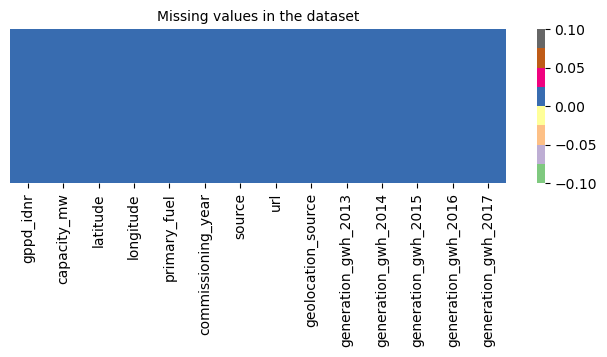

In [78]:
#Heatmap for the dataset for checking the missing values.

plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

In [79]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,334.911962,21.196189,77.447848,2003.650812,1473.084644,1561.595650,1549.929440,1599.178612,1698.183115
std,591.757208,6.248627,4.907260,15.117192,2637.730536,2849.999188,3056.230266,3077.703388,3118.777674
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,16.771575,74.258975,1998.000000,797.060000,805.760000,701.030000,716.730000,807.600000
50%,61.200000,21.778300,76.719250,2013.000000,797.060000,805.760000,701.030000,716.730000,807.600000
75%,417.502500,25.516375,79.441475,2013.000000,797.060000,805.760000,701.030000,731.967188,828.446950
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


We can observe that all the columns have the same number of data. We dont find any null values.

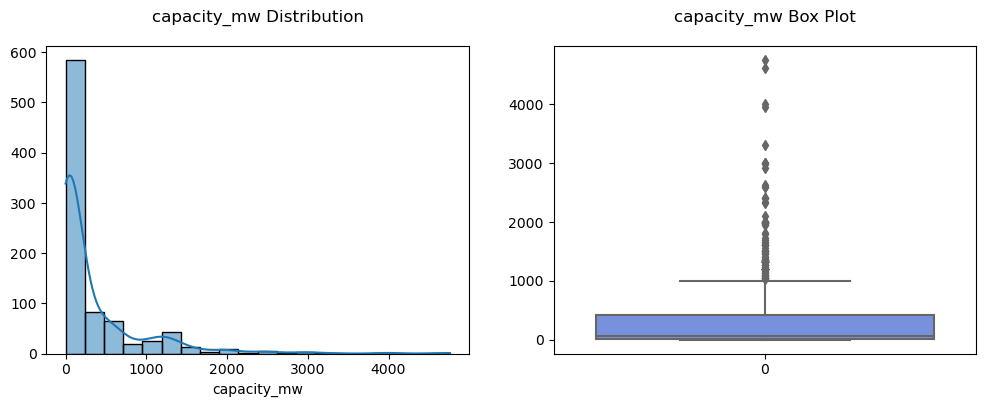

Skewness of capacity_mw : 3.106672055080208


In [81]:
#Data Visualisation
#Univariate Analysis
#Visualize target distribution-capacity_mw
col = 'capacity_mw'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

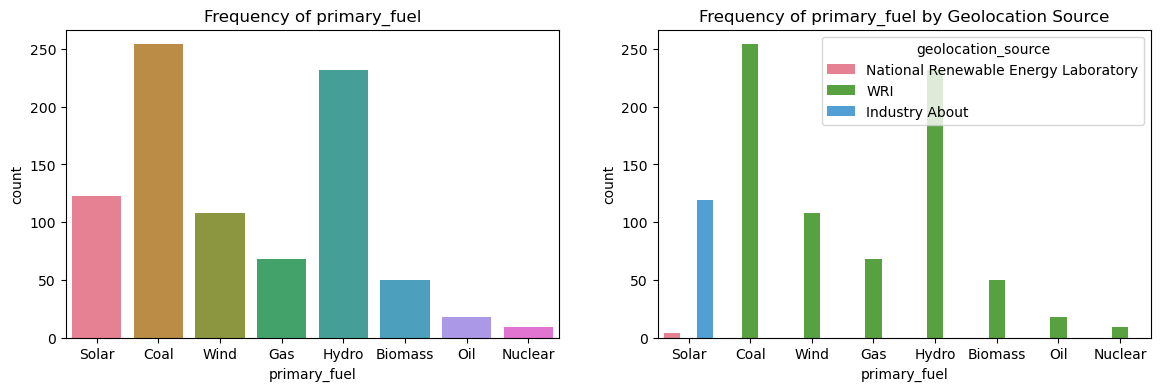

In [86]:
# Visualize the frequency of categorical target-primary_fuel
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

column = 'primary_fuel'
sns.countplot(data=df, x=column, ax=axs[0], palette='husl')
axs[0].set_title(f"Frequency of {column}")

sns.countplot(data=df, x=column, ax=axs[1], hue='geolocation_source', palette='husl')
axs[1].set_title(f"Frequency of {column} by Geolocation Source")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [83]:
#Independant Variables
#Categorical Columns
categorical_col

['gppd_idnr', 'source', 'url', 'geolocation_source']

In [87]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,797.060000,805.760000,701.030000,716.730000,807.600000
1,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
2,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,797.060000,805.760000,0.994875,233.596650,865.400000
904,WRI1026222,3.0,12.8932,78.1654,Solar,2013.0,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,797.060000,805.760000,701.030000,716.730000,807.600000
905,WRI1026776,25.5,15.2758,75.5811,Wind,2013.0,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
906,WRI1019901,80.0,24.3500,73.7477,Coal,2013.0,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,797.060000,805.760000,701.030000,716.730000,807.600000


In [90]:
#Lets drop gppd_idnr and url as its not going to contribute for the prediction model.
df.drop(['gppd_idnr','url'],axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,797.060000,805.760000,701.030000,716.730000,807.600000
1,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
2,39.2,21.9038,69.3732,Wind,2013.0,CDM,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,797.060000,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,2013.0,Karnataka Power Corporation Limited,Industry About,797.060000,805.760000,701.030000,716.730000,807.600000
905,25.5,15.2758,75.5811,Wind,2013.0,CDM,WRI,797.060000,805.760000,701.030000,716.730000,807.600000
906,80.0,24.3500,73.7477,Coal,2013.0,Hindustan Zinc ltd,WRI,797.060000,805.760000,701.030000,716.730000,807.600000


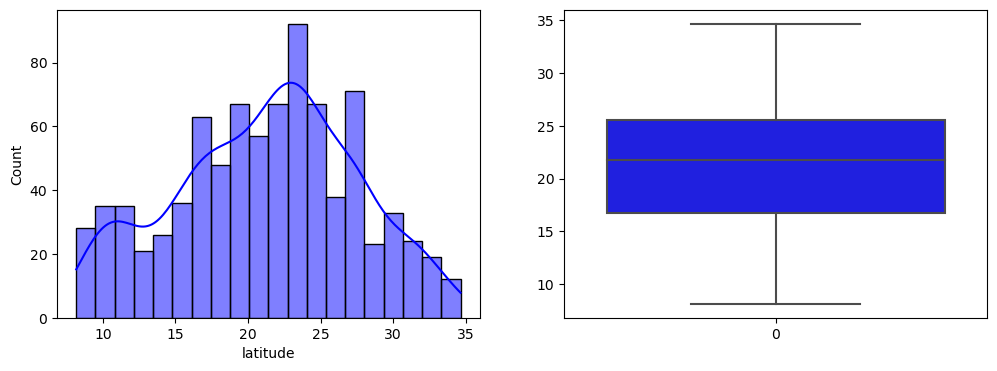

Skewness of latitude Distribution  -0.14362216739079825


In [92]:
#Lets see the visual representation of the numerical columns and see their skewness and outliers.
#Latitude Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['latitude'], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df['latitude'], ax=axes[1], color='blue')
plt.show()
print(f"Skewness of latitude Distribution ",df['latitude'].skew())

The distribution shows slight skewness to the left and it doesnt contain outliers.

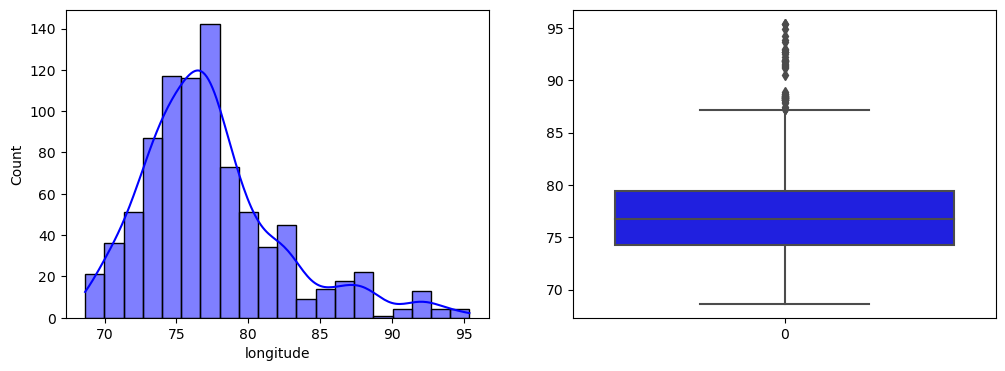

The skewness for longitude distribution  1.1009421966310269


In [93]:
#Longitude distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['longitude'], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df['longitude'], ax=axes[1], color='blue')
plt.show()
print(f"The skewness for longitude distribution ",df['longitude'].skew())

The skewness is to the right and we find many outliers in the distribution.

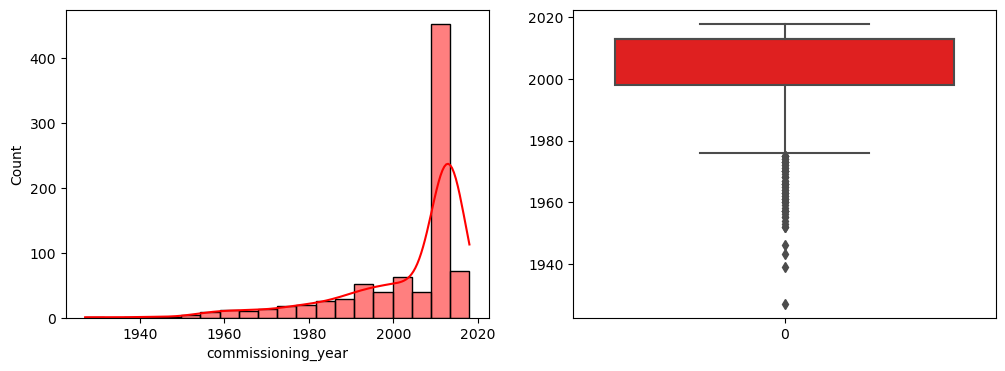

The skewness for longitude distribution  -1.746450794815883


In [95]:
#Commissioning Year Distribution

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['commissioning_year'], kde=True , bins=20, ax=axes[0], color='red')
sns.boxplot(df['commissioning_year'], ax=axes[1], color='red')
plt.show()
print(f"The skewness for commissioning year distribution ",df['commissioning_year'].skew())

The skewness is to the left and we do find outliers .

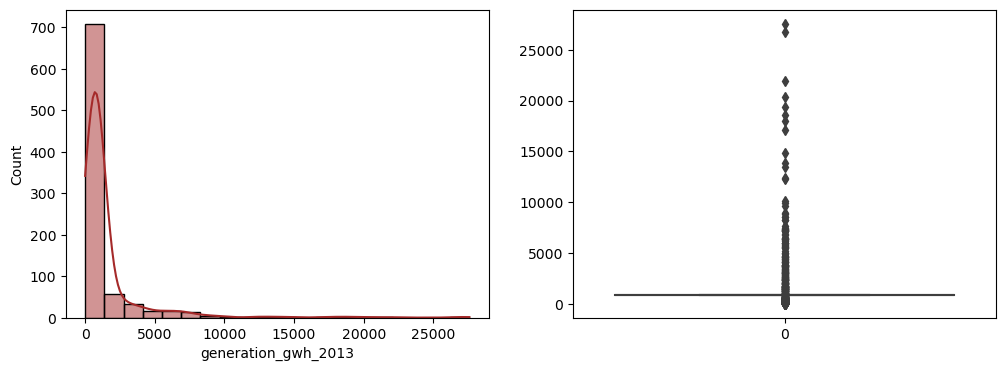

The skewness for generation_gwh_2013 distribution  5.389552169825279


In [96]:
# generation_gwh_2013 distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['generation_gwh_2013'], kde=True , bins=20, ax=axes[0], color='brown')
sns.boxplot(df['generation_gwh_2013'], ax=axes[1], color='brown')
plt.show()
print(f"The skewness for generation_gwh_2013 distribution ",df['generation_gwh_2013'].skew())

The skewness is towards the right and outliers are present.

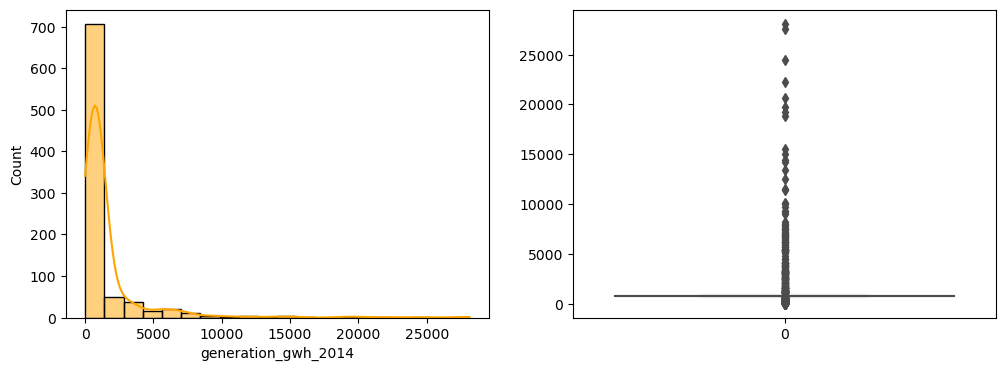

The skewness for generation_gwh_2014 distribution  5.183388325830368


In [97]:
# generation_gwh_2014 distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['generation_gwh_2014'], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df['generation_gwh_2014'], ax=axes[1], color='orange')
plt.show()
print(f"The skewness for generation_gwh_2014 distribution ",df['generation_gwh_2014'].skew())

The skewness is present towards rightside and outliers are present in the box plot.

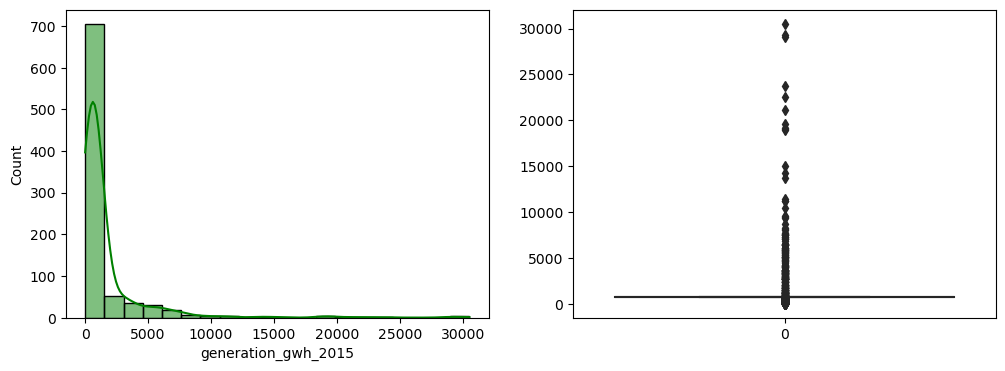

The skewness for generation_gwh_2015 distribution  5.420146400235594


In [98]:
# generation_gwh_2015 distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['generation_gwh_2015'], kde=True , bins=20, ax=axes[0], color='green')
sns.boxplot(df['generation_gwh_2015'], ax=axes[1], color='green')
plt.show()
print(f"The skewness for generation_gwh_2015 distribution ",df['generation_gwh_2015'].skew())

The skewness is towards the right and outliers are present in the box plot.

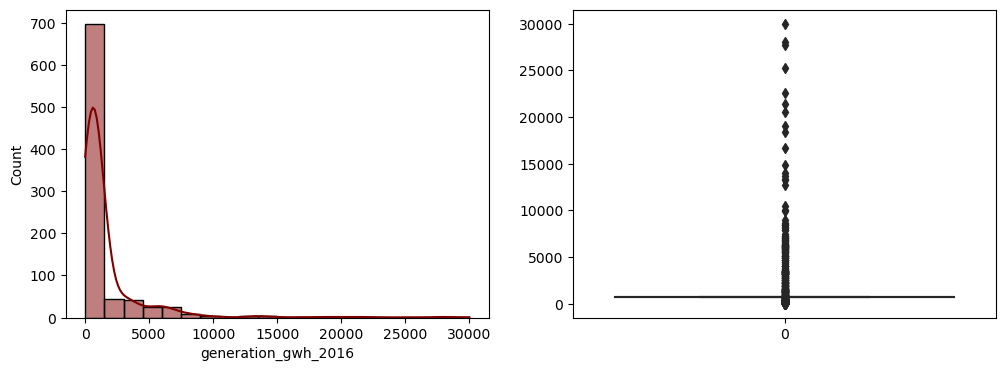

The skewness for generation_gwh_2016 distribution  5.1421563175949565


In [99]:
# generation_gwh_2016 distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['generation_gwh_2016'], kde=True , bins=20, ax=axes[0], color='maroon')
sns.boxplot(df['generation_gwh_2016'], ax=axes[1], color='maroon')
plt.show()
print(f"The skewness for generation_gwh_2016 distribution ",df['generation_gwh_2016'].skew())

The skewness is present towards the right side and outliers are identified in the box plot.

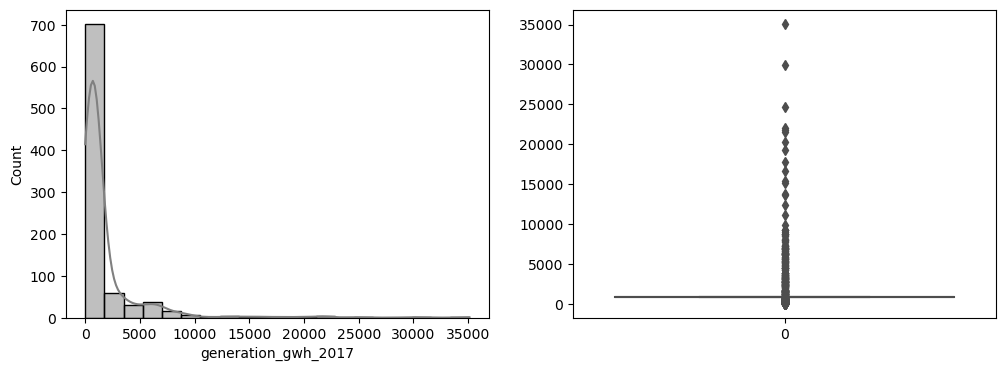

The skewness for generation_gwh_2017 distribution  5.177344296760085


In [100]:
# generation_gwh_2017 distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['generation_gwh_2017'], kde=True , bins=20, ax=axes[0], color='grey')
sns.boxplot(df['generation_gwh_2017'], ax=axes[1], color='grey')
plt.show()
print(f"The skewness for generation_gwh_2017 distribution ",df['generation_gwh_2017'].skew())

Skewness is seen on the right and there are outliers present in the box plot.

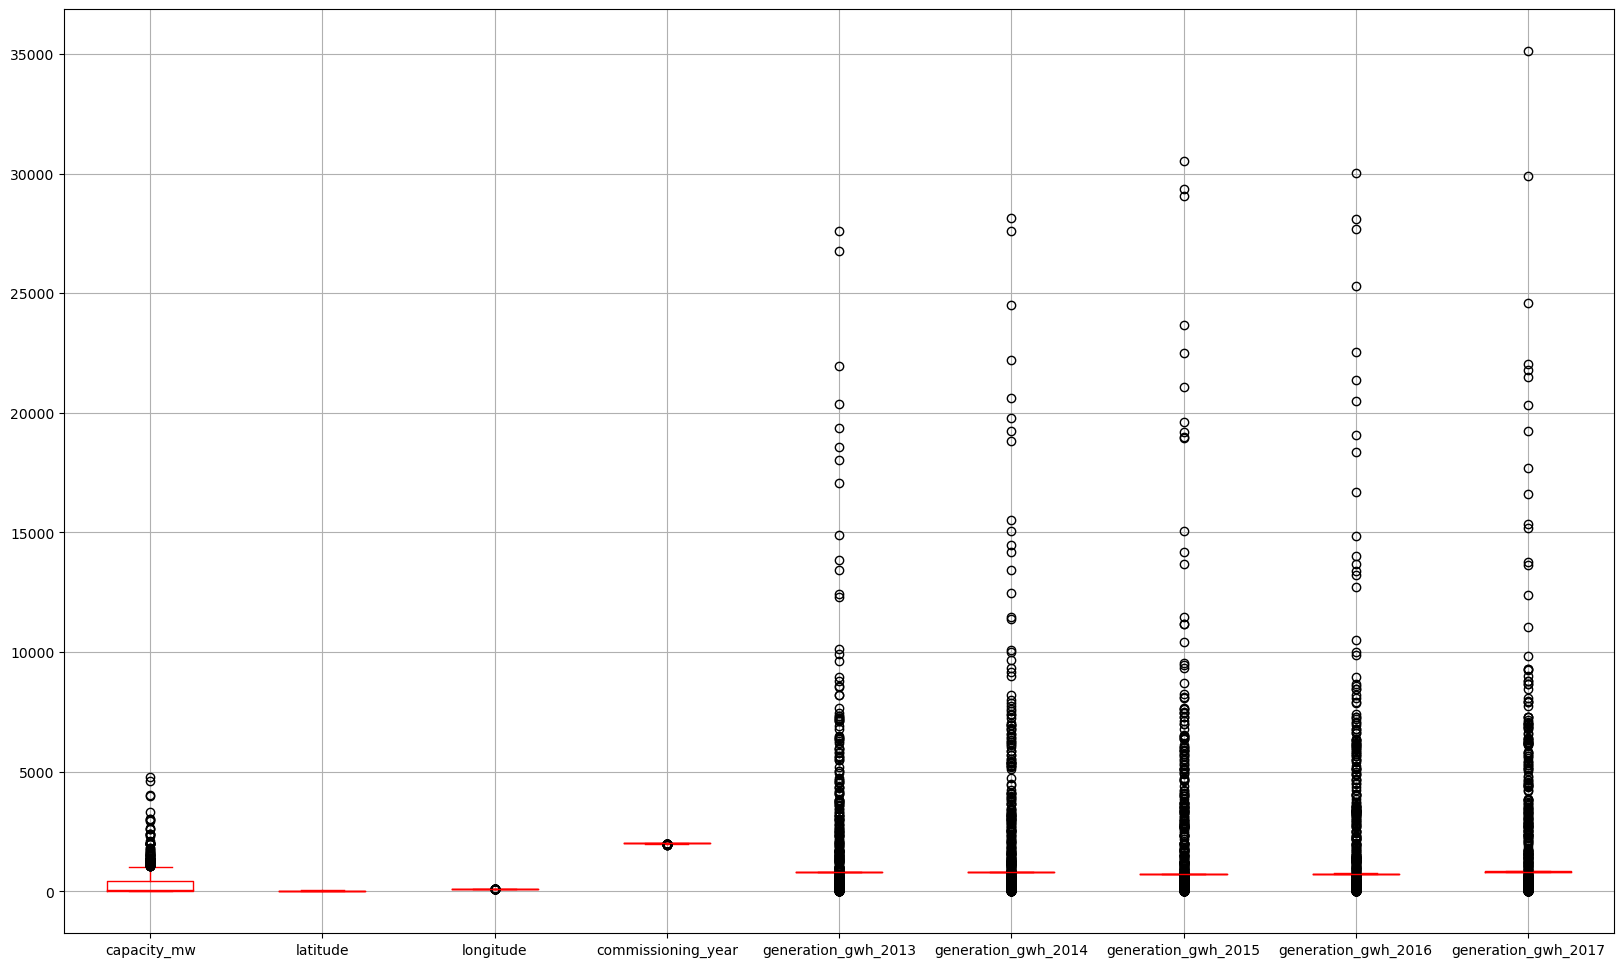

In [102]:
#Univariate Box plot
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='red')
plt.show()

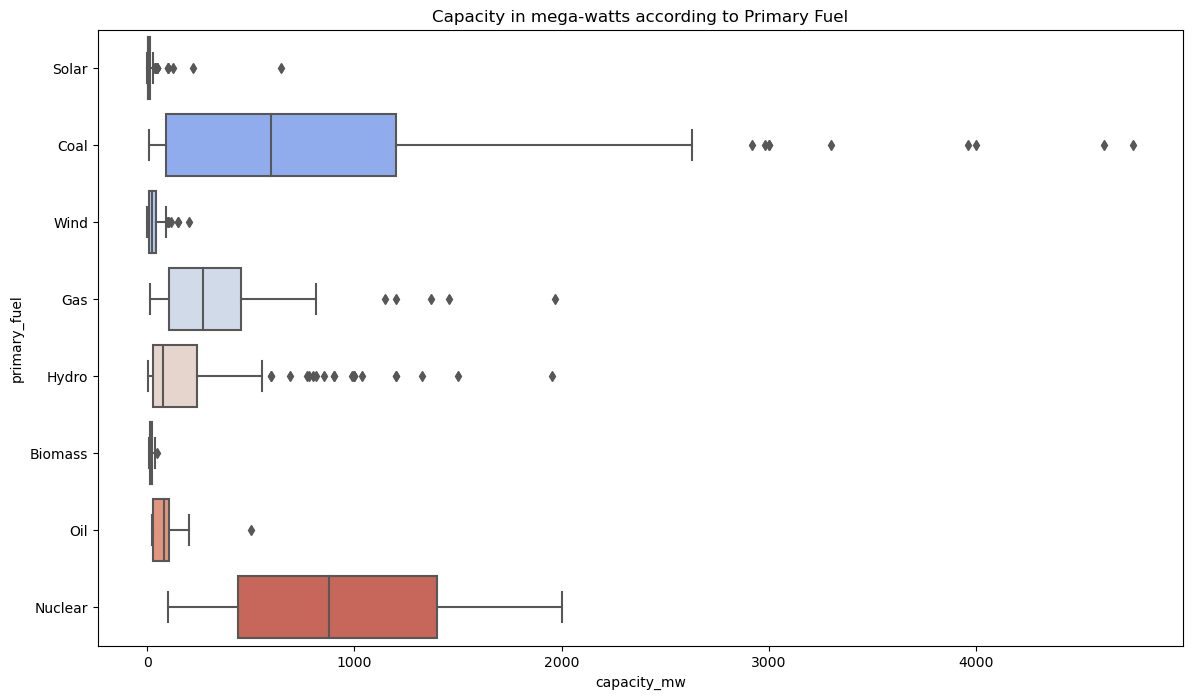

In [103]:
#Bivariate Analysis
#Capacity in mega-watts according to Primary Fuel
f, ax = plt.subplots(figsize=(14, 8))

sns.boxplot( x='capacity_mw', y='primary_fuel', data= df, palette='coolwarm')
plt.title("Capacity in mega-watts according to Primary Fuel")
plt.show()

The nuclear plants have the greatest energy production capacity followed by coal, gas, hydro, oil, wind, solar, and biomass plants. Solar and biomass plants the ones with the least capacity to produce energy.

Also, we can see there are some outliers in the data which the primary fuel is Coal, Hydro, Gas, and Solar.

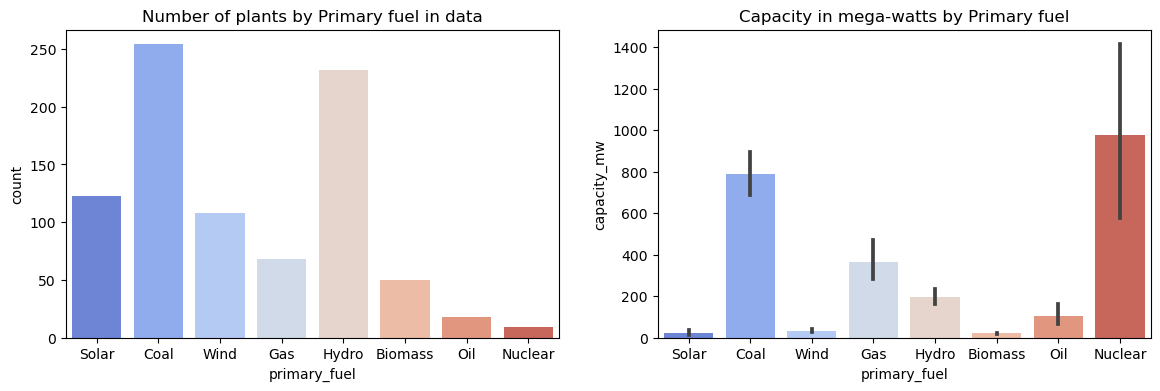

In [108]:
#Comparing the Capacity in mega-watts with the number of plants registered according to the primary fuel
fig, axs = plt.subplots(1, 2, figsize=(14, 4))
column='primary_fuel'
sns.countplot(data=df, x=column, ax=axs[0], palette='coolwarm')
axs[0].set_title(f"Number of plants by Primary fuel in data")

sns.barplot( y='capacity_mw', x='primary_fuel', data= df, palette='coolwarm');
axs[1].set_title(f"Capacity in mega-watts by Primary fuel")

plt.show()

There is a greater presence of Coal and Hydro plants and a minimal presence of nuclear plants. However, nuclear plants are the ones with the greatest production capacity, followed by coal plants. In the following sections, we will analyze the generation over the years of the plants with different primary fuels.

In [109]:
#Average Generation in giga-watts through years Box Plot
# Combine the power generation columns
df_generation_1c = pd.melt(df, id_vars=['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year'], value_vars = generation_col ,var_name='year', value_name='generation_gwh')

# Extract the year
df_generation_1c['year'] = df_generation_1c['year'].str.extract(r'(\d{4})')

df_generation_1c.sample(10)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year,generation_gwh
2926,800.0,31.3820,76.8761,Hydro,2015.0,2016,3209.03420
1277,180.0,9.9624,76.9570,Hydro,1997.0,2014,574.26425
3609,990.0,31.4133,76.8686,Hydro,1979.0,2017,3070.80880
348,26.0,12.7020,76.9787,Biomass,2013.0,2013,797.06000
3342,132.0,27.0017,88.4430,Hydro,2013.0,2016,551.10065
3832,2.0,21.3170,78.6025,Solar,2013.0,2017,807.60000
2795,15.0,34.2236,74.7781,Hydro,1959.0,2016,716.73000
2115,5.0,23.3578,70.0548,Solar,2013.0,2015,701.03000
3698,18.9,19.2829,77.1384,Biomass,2013.0,2017,807.60000
1653,200.0,14.7053,77.3355,Wind,2013.0,2014,805.76000


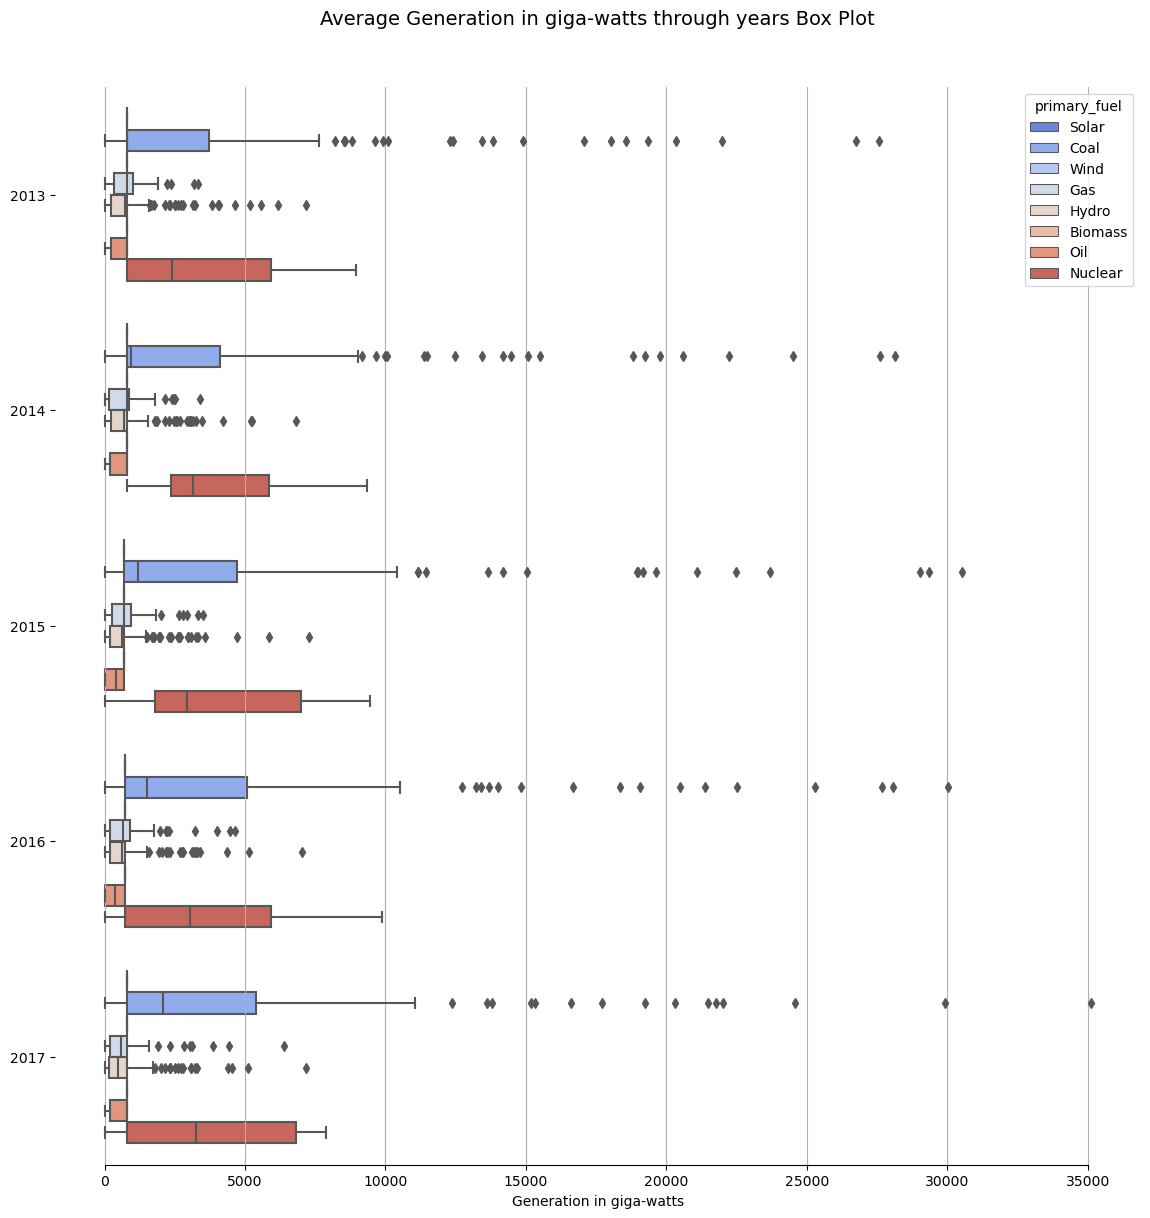

In [110]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 14))

sns.boxplot(y='year', x='generation_gwh', hue='primary_fuel', data= df_generation_1c, palette='coolwarm')

# visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel='Generation in giga-watts')
sns.despine(trim=True, left=True)

plt.title('Average Generation in giga-watts through years Box Plot', size=14, y=1.05)
plt.show()



In [111]:
# Calculate the capacity and generation mean through the years by Primary Fuel
df_gen_by_year = df_generation_1c.groupby(['year','primary_fuel'], as_index=False).agg({'capacity_mw': 'mean', 
                                                                                        'generation_gwh': ['mean','sum']})
# Setting column names
df_gen_by_year.columns = ['year', 'primary_fuel', 'capacity_mw mean', 'generation_gwh mean', 'generation_gwh sum']

# Transform to ordered categories
order_cat = ['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil', 'Nuclear']
df_gen_by_year['primary_fuel'] = pd.Categorical(df_gen_by_year['primary_fuel'], categories=order_cat, ordered=True)

df_gen_by_year

,year,primary_fuel,capacity_mw mean,generation_gwh mean,generation_gwh sum
0,2013,Biomass,20.065200,797.060000,39853.000000
1,2013,Coal,789.382756,2986.482818,758566.635887
2,2013,Gas,366.159868,826.687619,56214.758060
3,2013,Hydro,195.910647,814.357502,188930.940500
4,2013,Nuclear,975.555556,3644.418667,32799.768000
5,2013,Oil,104.491111,517.388947,9313.001043
6,2013,Solar,20.565041,797.060000,98038.380000
7,2013,Wind,33.769907,797.060000,86082.480000
8,2014,Biomass,20.065200,805.760000,40288.000000
9,2014,Coal,789.382756,3306.338094,839809.875920


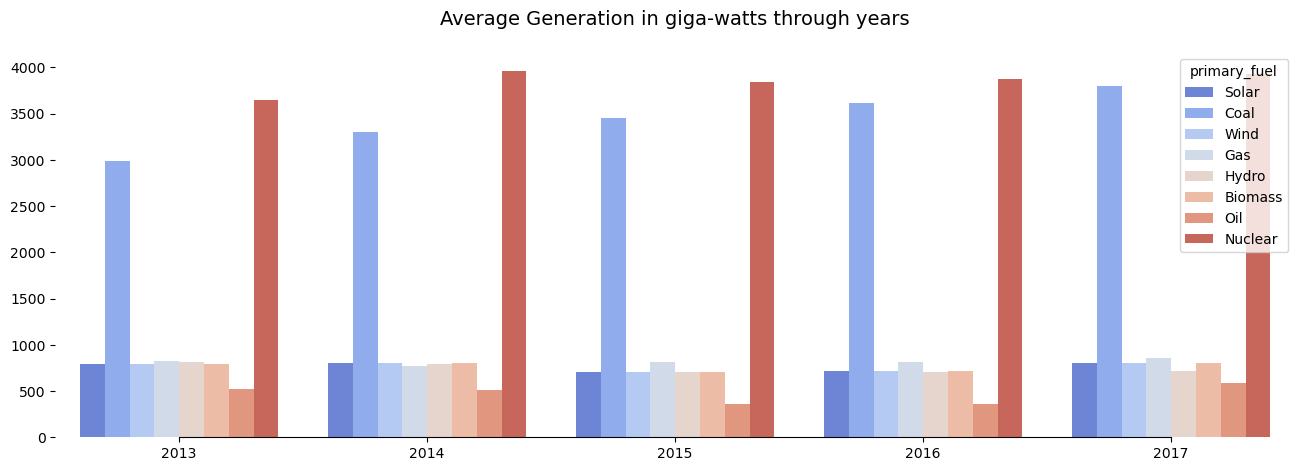

In [112]:
#Average generation in gigawatts through years
plt.figure(figsize=(16,5))
sns.barplot(x='year', y='generation_gwh mean', hue='primary_fuel', data= df_gen_by_year, palette='coolwarm')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.title('Average Generation in giga-watts through years', size=14, y=1.05)
plt.show()

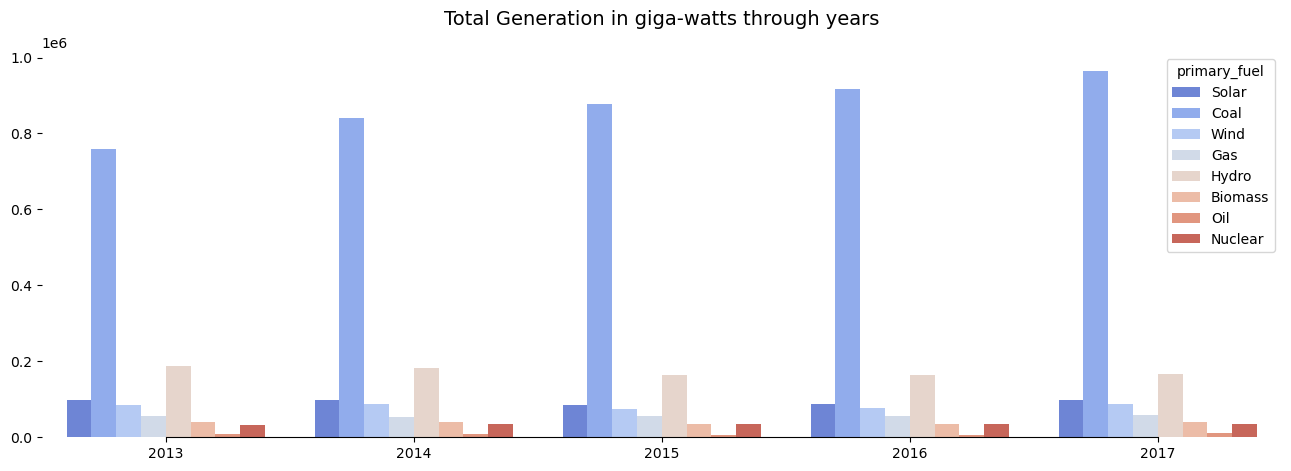

In [113]:
#Total Generation in gigawatts through years
plt.figure(figsize=(16,5))
sns.barplot(x='year', y='generation_gwh sum', hue='primary_fuel', data= df_gen_by_year, palette='coolwarm')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.title('Total Generation in giga-watts through years', size=14, y=1.05)
plt.show()

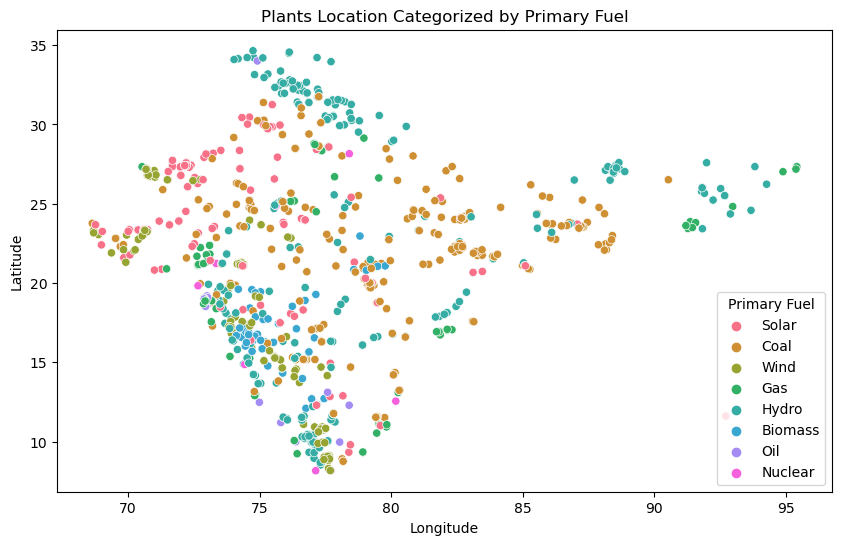

In [114]:
#Plant Location categorised by primary fuel
plt.figure(figsize=(10, 6))

# scatterplot
sns.scatterplot(x='longitude', y='latitude', hue='primary_fuel', data=df)

# visual presentation
plt.legend(loc='lower right').set_title("Primary Fuel")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plants Location Categorized by Primary Fuel')
plt.show()

/Users/maha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


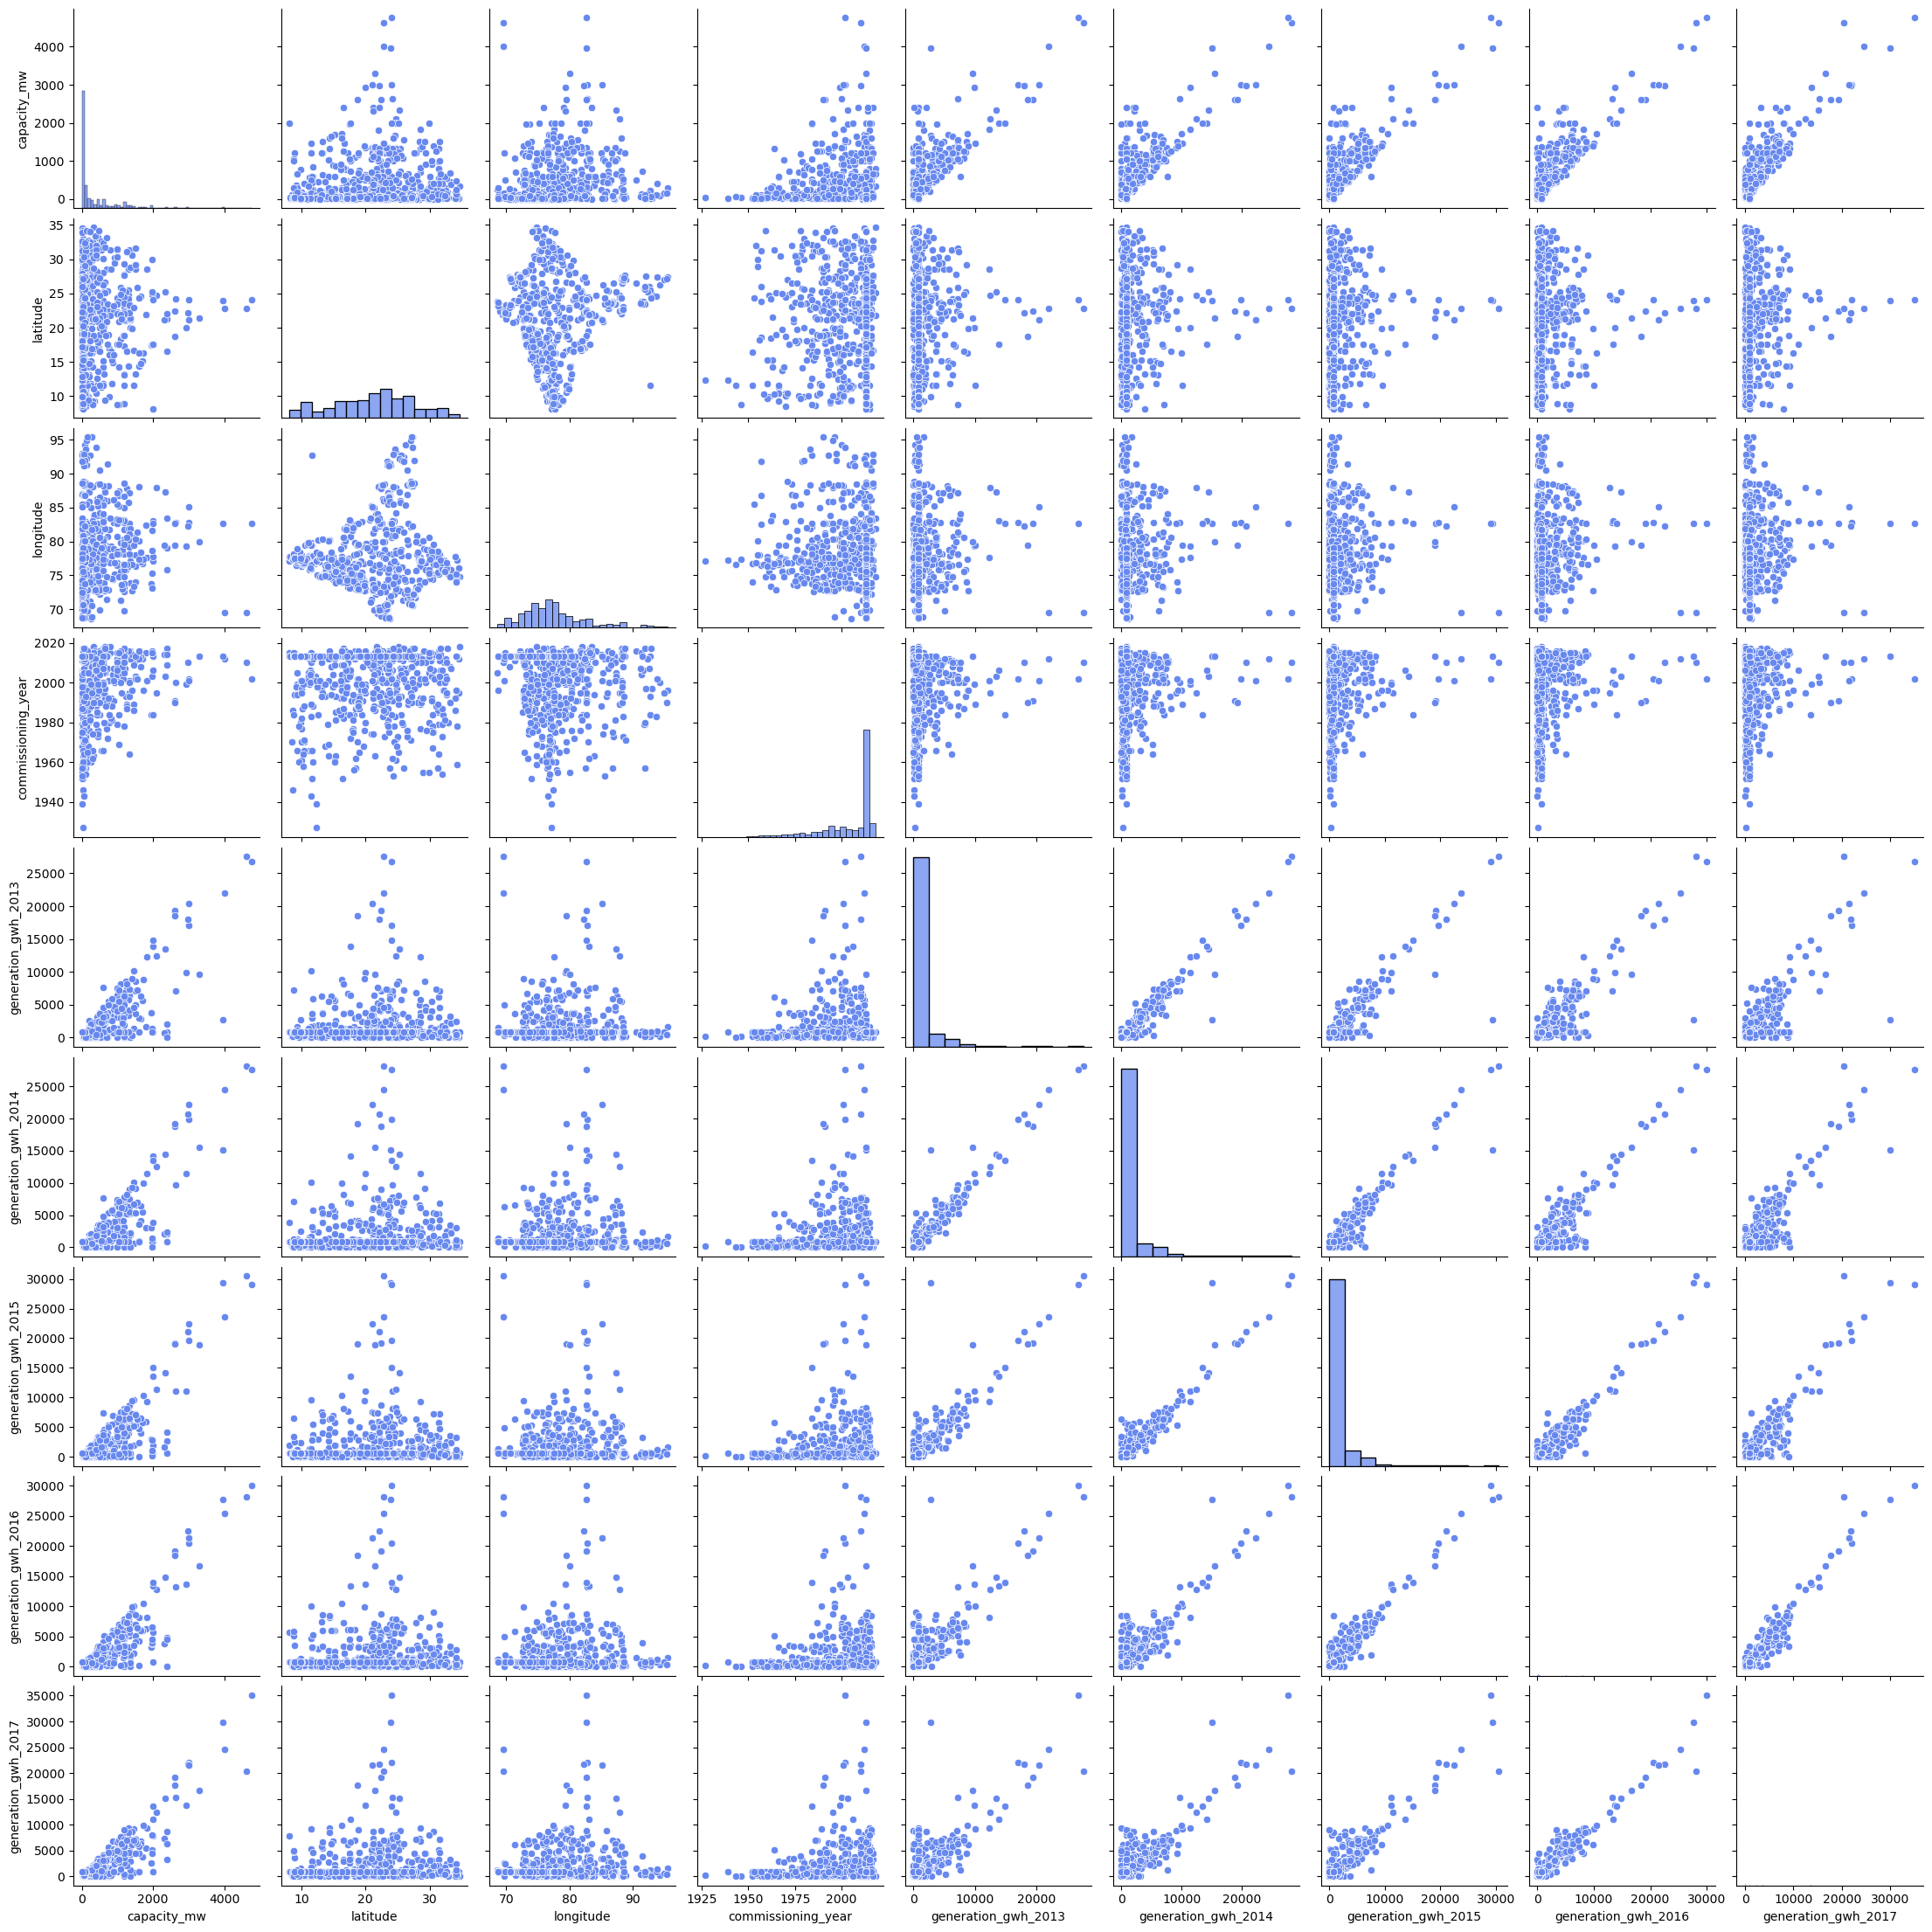

In [117]:
#Multivariate Analysis 
grid = sns.pairplot(df)
plt.show()

We can see that the capacity_mw variable has a strong positive relationship with the power generation variables which makes sense.

The generation_gwh variables have a positive relationship with each other.

In [118]:
#Using LabelEncoder for convering Categorical to Numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          862 non-null    float64
 1   latitude             862 non-null    float64
 2   longitude            862 non-null    float64
 3   primary_fuel         862 non-null    object 
 4   commissioning_year   862 non-null    float64
 5   source               862 non-null    object 
 6   geolocation_source   862 non-null    object 
 7   generation_gwh_2013  862 non-null    float64
 8   generation_gwh_2014  862 non-null    float64
 9   generation_gwh_2015  862 non-null    float64
 10  generation_gwh_2016  862 non-null    float64
 11  generation_gwh_2017  862 non-null    float64
dtypes: float64(9), object(3)
memory usage: 119.8+ KB


In [119]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [120]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [121]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [122]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [123]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [124]:
df['source'].unique()

array([109, 174,  21,  22,  58,  36,  10, 148, 112,  97,  84,  67,  14,
        75,  65,  64, 172, 184,  62,  72, 106, 163, 179, 142,  17,  18,
        68,   6,   2, 144, 125,  61, 102,  85,  83,  26,   4,  88, 122,
         3,  19,  59,  54,  95,  29,  89, 157, 119, 134,  20,  31,  32,
       103, 151,  76, 146,  70, 110, 188, 173,  39,   9, 158,  23,  86,
        47, 117, 162, 121,  98, 129, 155,   8,  73, 126, 135,  38,  56,
        77,  46,  74, 164, 187,  24,  79, 190,  96,  43, 178, 160,  57,
       152,  82,  15, 115,  55,  33,  42,  12, 132, 145,  53,  40, 156,
         1, 175, 176,  69, 138,  63, 167,  87, 123,  25, 120,  90,  16,
        91,  92,  93,  94,   7, 136,  50, 116, 170, 168,  49, 133,  44,
       127, 171, 118, 131, 107, 113,  37,  60, 124,  41, 153,  52,  28,
       143, 177, 165,  48, 159, 111, 147,  11, 186, 169,  66, 161, 139,
       185, 140,  45,  81, 154, 181, 149, 141,  30, 150,  34, 105,   5,
       128,  99,  71,  13, 137,  80, 100,  27,  35, 104, 130, 11

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 0 to 907
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          862 non-null    float64
 1   latitude             862 non-null    float64
 2   longitude            862 non-null    float64
 3   primary_fuel         862 non-null    int64  
 4   commissioning_year   862 non-null    float64
 5   source               862 non-null    int64  
 6   geolocation_source   862 non-null    int64  
 7   generation_gwh_2013  862 non-null    float64
 8   generation_gwh_2014  862 non-null    float64
 9   generation_gwh_2015  862 non-null    float64
 10  generation_gwh_2016  862 non-null    float64
 11  generation_gwh_2017  862 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 119.8 KB


In [126]:
#Correlation between the variables
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.050107,0.198377,-0.375722,0.008698,-0.253760,0.216378,0.756255,0.804637,0.830523,0.863955,0.877208
latitude,0.050107,1.000000,0.031501,-0.013882,0.036102,0.056544,-0.184765,0.054611,0.059078,0.054380,0.048227,0.058085
longitude,0.198377,0.031501,1.000000,-0.359828,-0.150133,-0.241575,0.253467,0.100754,0.106057,0.123822,0.146656,0.154447
primary_fuel,-0.375722,-0.013882,-0.359828,1.000000,0.136547,0.060258,-0.512221,-0.228937,-0.240733,-0.250011,-0.260721,-0.264427
commissioning_year,0.008698,0.036102,-0.150133,0.136547,1.000000,0.308686,-0.251156,-0.045479,-0.018596,0.005830,0.030677,0.043814
source,-0.253760,0.056544,-0.241575,0.060258,0.308686,1.000000,-0.506409,-0.127983,-0.132435,-0.138705,-0.143181,-0.142597
geolocation_source,0.216378,-0.184765,0.253467,-0.512221,-0.251156,-0.506409,1.000000,0.104128,0.107750,0.112851,0.116492,0.116017
generation_gwh_2013,0.756255,0.054611,0.100754,-0.228937,-0.045479,-0.127983,0.104128,1.000000,0.970247,0.907009,0.878581,0.838736
generation_gwh_2014,0.804637,0.059078,0.106057,-0.240733,-0.018596,-0.132435,0.107750,0.970247,1.000000,0.963552,0.935022,0.903754
generation_gwh_2015,0.830523,0.054380,0.123822,-0.250011,0.005830,-0.138705,0.112851,0.907009,0.963552,1.000000,0.973425,0.940252


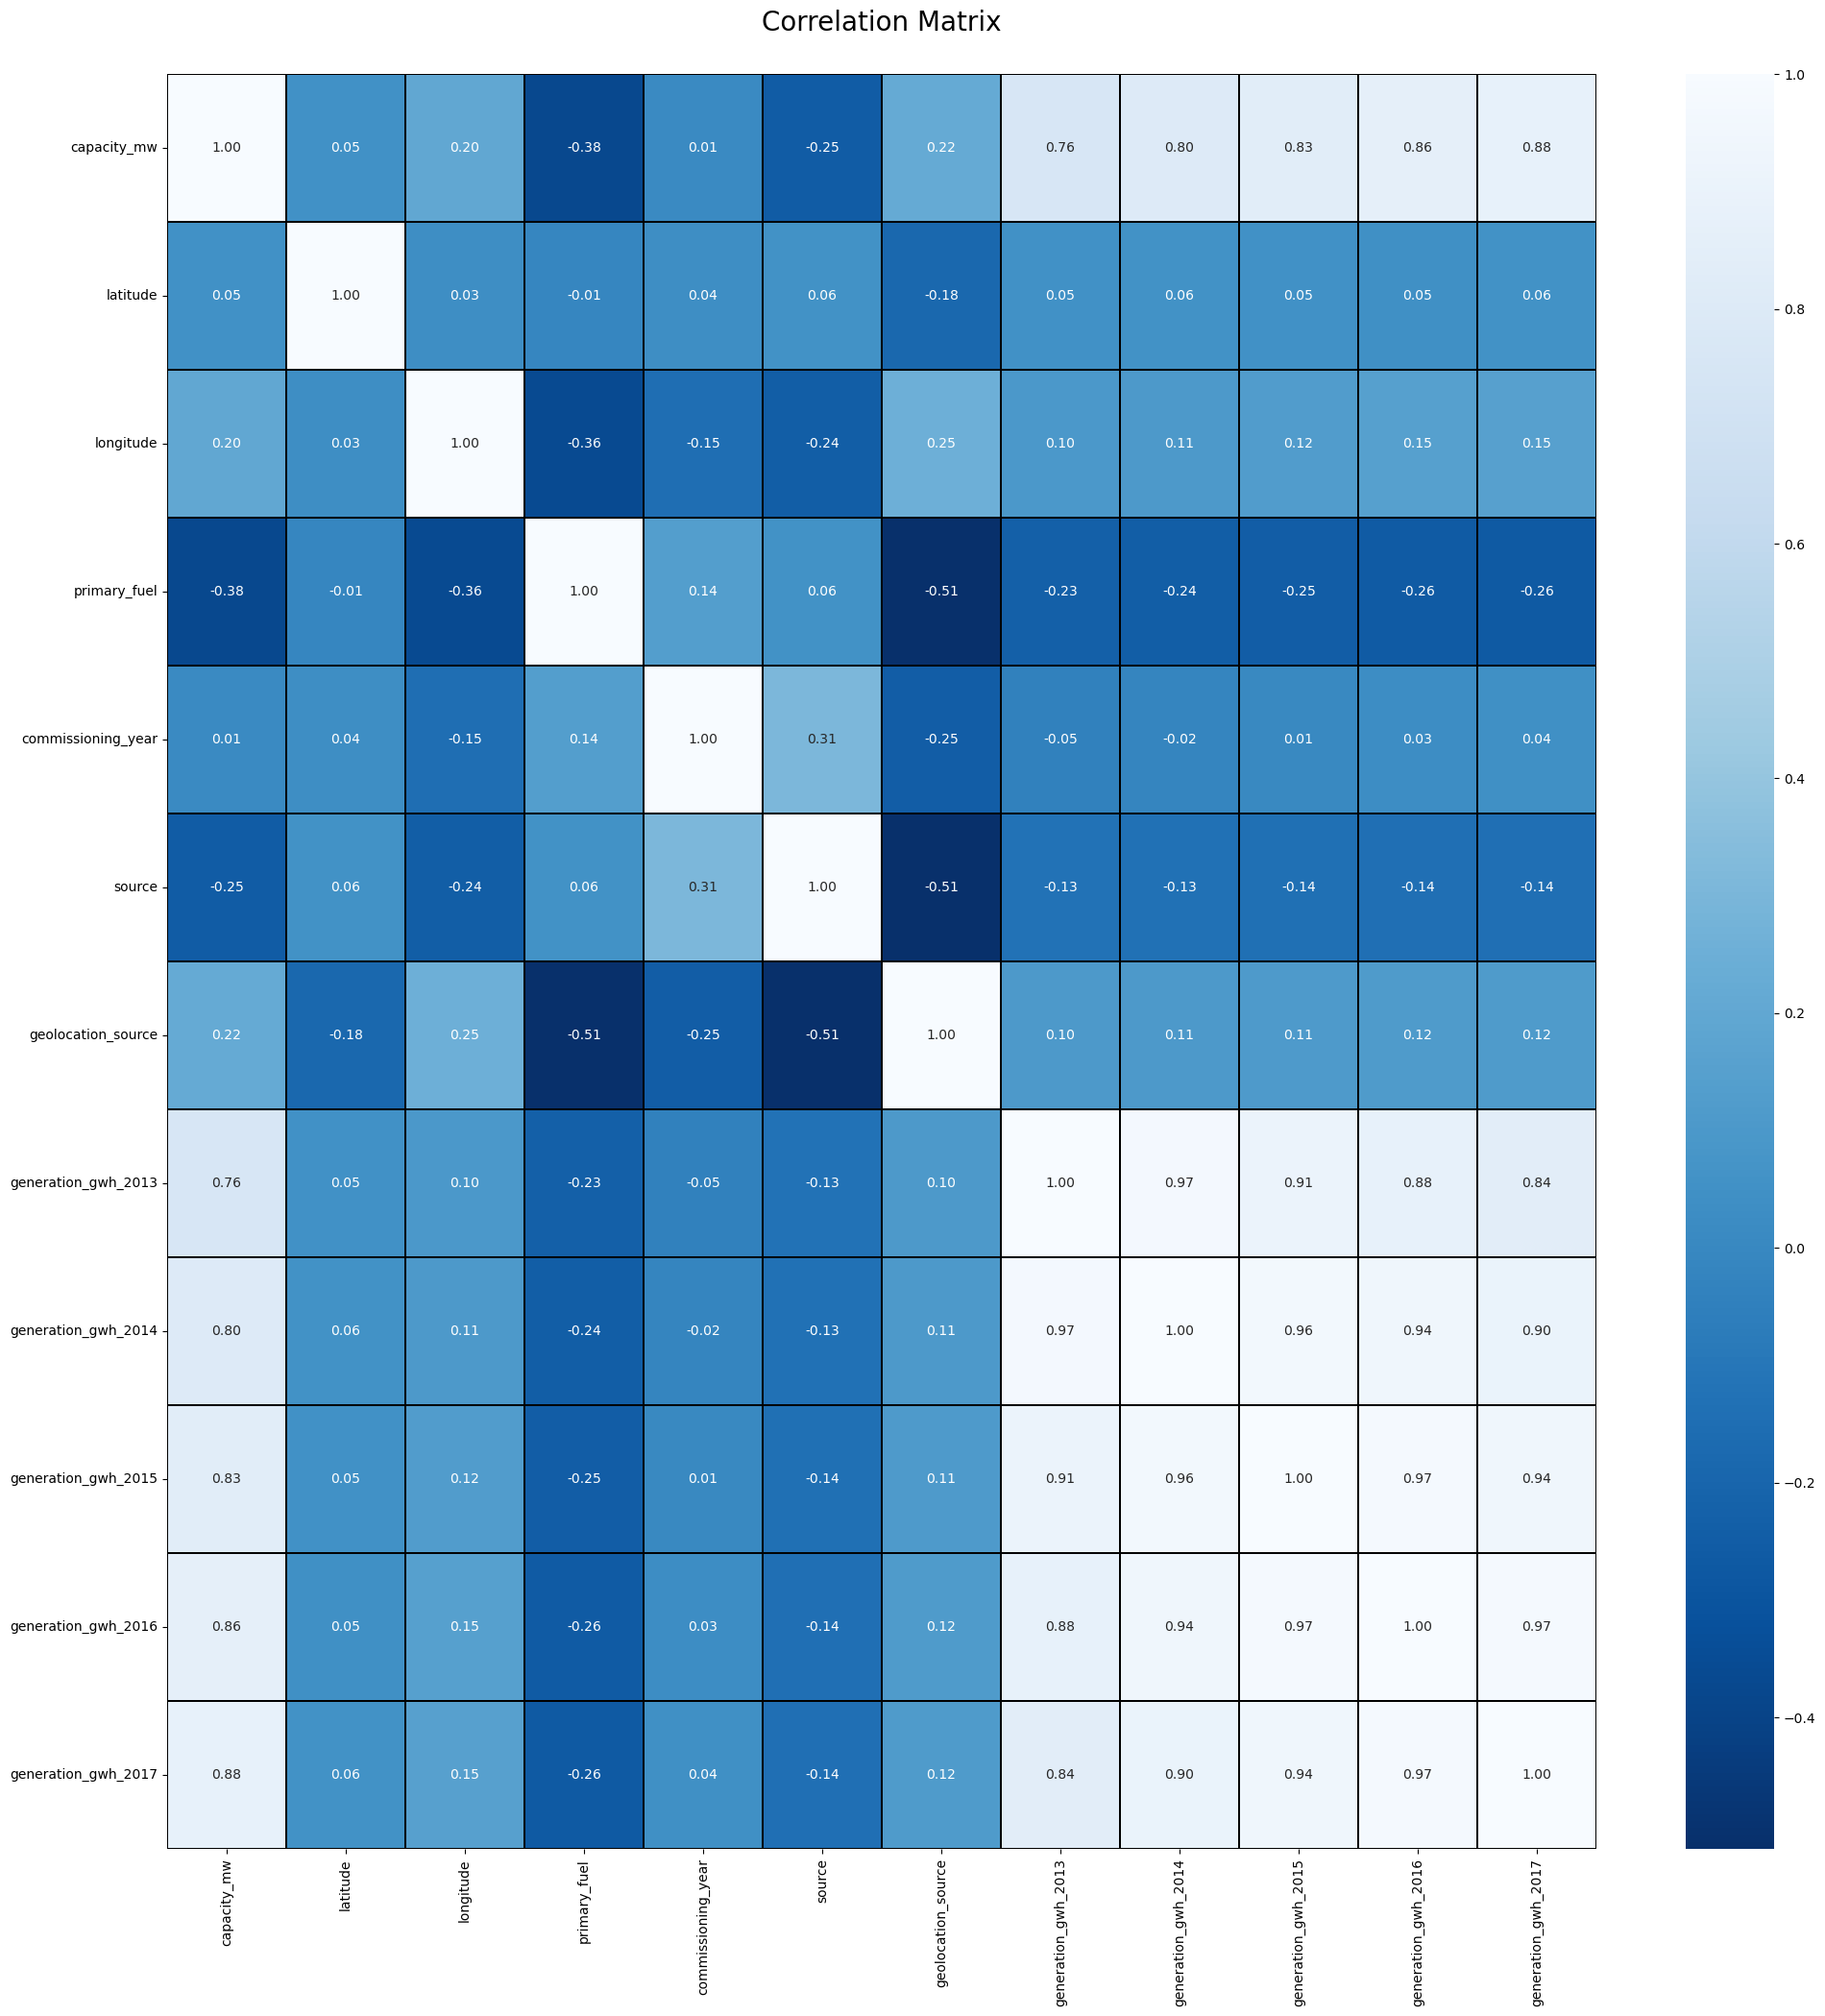

In [129]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

This heatmap shows the correlation matrix. We can observe the relationship between feature-to-feature and feature-to-label.

This heatmap contains both positive and negative correlations.
The capacity_mw feature has more correlation with the power generation columns and is negatively correlated with primary_fuel column.
The primary_fuel feature is slightly correlated with geolocation_source.
The columns 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2013' are highly correlated with each other.

In [130]:
#Removing Outliers
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.562063,1.118929,0.857829,1.261468,0.486430,1.421978,1.040298,0.256439,0.265360,0.277922,0.286890,0.285721
1,0.400586,0.571675,0.578835,0.943287,0.618806,2.857250,0.406052,0.256439,0.265360,0.277922,0.286890,0.285721
2,0.500009,0.113308,1.646405,1.702419,0.618806,0.521160,0.406052,0.256439,0.265360,0.277922,0.286890,0.285721
3,0.338024,0.428344,2.836701,0.502336,0.023112,0.499079,0.406052,0.319136,0.331352,0.231197,0.231857,0.331864
4,2.477264,0.122356,1.011590,0.943287,0.751183,0.499079,0.406052,0.074048,0.517477,1.429531,1.509735,1.183007
...,...,...,...,...,...,...,...,...,...,...,...,...
903,2.139091,0.784834,0.018564,0.943287,0.817371,0.499079,0.406052,0.256439,0.265360,0.507106,0.443959,0.267177
904,0.561218,1.329542,0.146307,1.261468,0.618806,0.715382,2.486647,0.256439,0.265360,0.277922,0.286890,0.285721
905,0.523173,0.948020,0.380626,1.702419,0.618806,0.521160,0.406052,0.256439,0.265360,0.277922,0.286890,0.285721
906,0.431021,0.505014,0.754453,0.943287,0.618806,0.317922,0.406052,0.256439,0.265360,0.277922,0.286890,0.285721


In [131]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]
df=df_new.copy()
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,797.060000,805.760000,701.030000,716.730000,807.600000
1,98.0,24.7663,74.6090,1,2013.0,174,2,797.060000,805.760000,701.030000,716.730000,807.600000
2,39.2,21.9038,69.3732,7,2013.0,21,2,797.060000,805.760000,701.030000,716.730000,807.600000
3,135.0,23.8712,91.3602,2,2004.0,22,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2016.0,22,2,797.060000,805.760000,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,2013.0,77,0,797.060000,805.760000,701.030000,716.730000,807.600000
905,25.5,15.2758,75.5811,7,2013.0,21,2,797.060000,805.760000,701.030000,716.730000,807.600000
906,80.0,24.3500,73.7477,1,2013.0,59,2,797.060000,805.760000,701.030000,716.730000,807.600000


In [132]:
#Checking Skewness

df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
generation_gwh_2013,2.989247
generation_gwh_2014,2.870702
generation_gwh_2015,2.681762
generation_gwh_2016,2.625899
generation_gwh_2017,2.498097
capacity_mw,1.901384
source,1.731554
longitude,0.934989
primary_fuel,0.457639
latitude,-0.115497


In [134]:
# Removing skewness using yeo-johnson method to get better prediction
from sklearn.preprocessing import PowerTransformer
features = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','longitude']


scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [136]:
df[features] = scaler.fit_transform(df[features].values)
df[features].head()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,longitude
0,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309,-0.896936
1,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309,-0.487904
2,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309,-2.308663
3,-0.266681,-0.277490,0.090360,0.109763,-0.196571,2.344386
4,0.713062,1.370945,2.204896,2.206716,1.940645,1.216636


In [137]:
df.skew()

capacity_mw            1.901384
latitude              -0.115497
longitude              0.011691
primary_fuel           0.457639
commissioning_year    -1.564898
source                 1.731554
geolocation_source    -2.032519
generation_gwh_2013    0.257018
generation_gwh_2014    0.216104
generation_gwh_2015    0.151695
generation_gwh_2016    0.140813
generation_gwh_2017    0.121606
dtype: float64

/var/folders/nv/045fvzqd0m7dgtgmcc0_1j0h0000gn/T/ipykernel_39349/1269658108.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='r')
/var/folders/nv/045fvzqd0m7dgtgmcc0_1j0h0000gn/T/ipykernel_39349/1269658108.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color

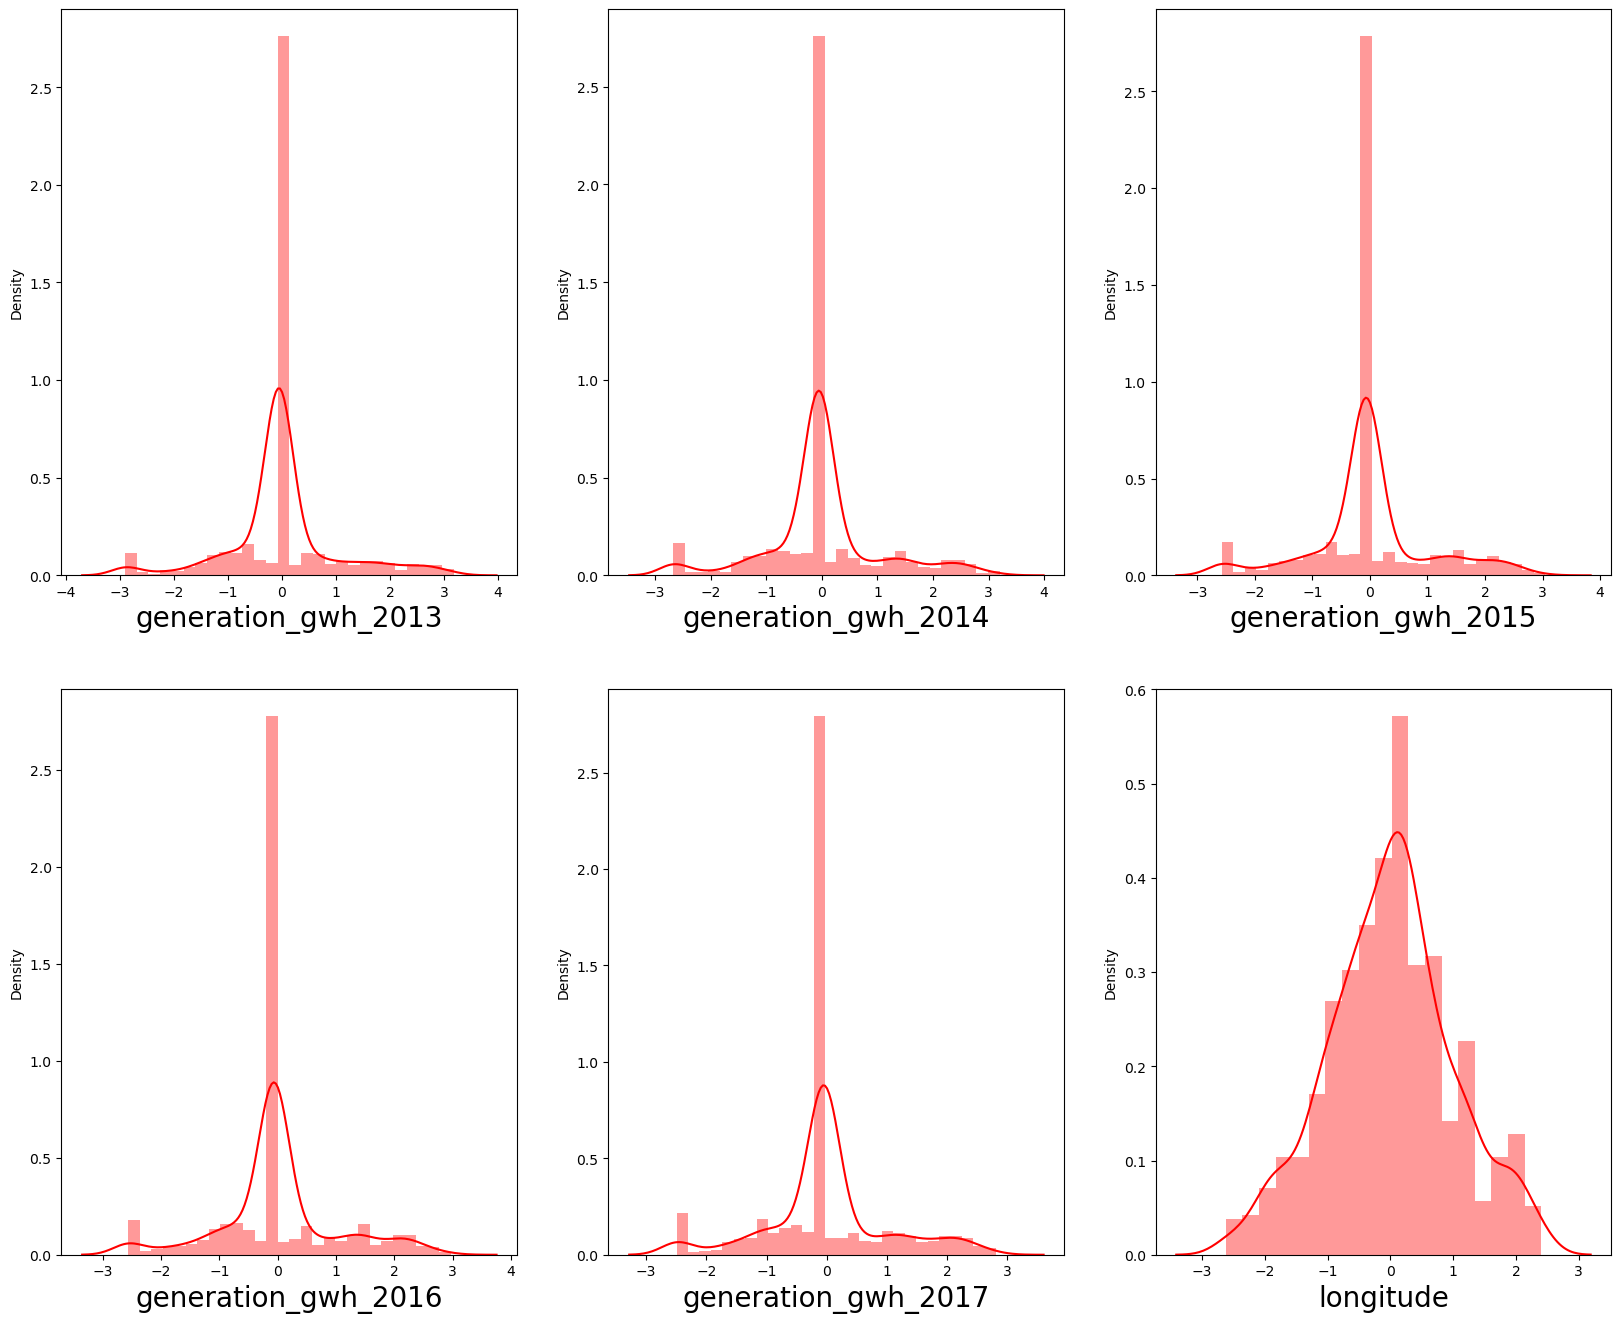

In [139]:
# Visualizing the distribution of the columns after removing skewness
#Lets see the visualisation for the skewness
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [141]:
#Feature Scaling using Standard Scalarization
#Separting Feautres and Labels
# Separating the independent and target variables into x and y 
#Seperating feature for regression model
x = df.drop('capacity_mw', axis=1)
y = df['capacity_mw']

In [142]:
#Scaling the data for regression model.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model {'*'*30}")
display(x.head())



****************************** x features for regression model ******************************


,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.122506,-0.896936,1.214243,0.468331,1.490374,-1.019582,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309
1,0.578528,-0.487904,-0.959100,0.617295,2.981266,0.412133,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309
2,0.122906,-2.308663,1.648912,0.617295,-0.528063,0.412133,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309
3,0.436056,2.344386,-0.524431,-0.053041,-0.505126,0.412133,-0.266681,-0.277490,0.090360,0.109763,-0.196571
4,0.131899,1.216636,-0.959100,0.766258,-0.505126,0.412133,0.713062,1.370945,2.204896,2.206716,1.940645


In [143]:
#Multicolinearity and feature selection based on VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
9,generation_gwh_2016,10.367398
7,generation_gwh_2014,7.045019
8,generation_gwh_2015,6.208489
10,generation_gwh_2017,5.444180
6,generation_gwh_2013,5.443397
5,geolocation_source,2.053841
2,primary_fuel,1.819697
4,source,1.635331
1,longitude,1.343195
3,commissioning_year,1.220678


In [144]:
#Dropping the column with VIF value more than 10, which would be showing multicolinearity.
x = x.drop(['generation_gwh_2016'], axis=1) 

In [145]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
7,generation_gwh_2014,7.045019
6,generation_gwh_2013,5.425297
8,generation_gwh_2015,4.203514
9,generation_gwh_2017,2.641110
5,geolocation_source,2.053583
2,primary_fuel,1.817438
4,source,1.633010
1,longitude,1.331027
3,commissioning_year,1.194678
0,latitude,1.083958


In [146]:
#Finding the best Random State
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        acc = r2_score(y_test, y_pred)

        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [147]:
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.6148 at random_state 90


In [148]:
#Creating Train split test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (559, 10)
x_test shape:   (240, 10)
y_train shape:  (559,)
y_test shape:   (240,)


In [149]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])
eval_model

,id,Model,RMSE,R2_Score(test),CV_Mean


Regression Algorithm

In [152]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)


print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }


LR coef_        : [   2.42719485   13.98340961 -126.56270509    3.20505153 -110.64211115
  -19.04278602   16.13366116  -11.82532737   42.49928658  189.19659848]

LR intercept_ : 272.7218740485632
LR score train  : 0.5041656344698491
LR score test   : 0.6147595347119704
Mean squared error: 81455.3785
Root Mean squared error: 285.4039
Cross-validation results (R2): [0.58835917 0.35060482 0.00488599 0.63837678 0.42618572 0.42318883
 0.60915537 0.58340988 0.53317223 0.63036686]
Average R2: 0.4788
R2_Score(test): 0.6148


In [163]:
from sklearn.model_selection import RandomizedSearchCV

In [164]:

%%time

# RANDOM FOREST REGRESSOR
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

CPU times: user 178 ms, sys: 97.9 ms, total: 276 ms
Wall time: 2.17 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=90)

In [165]:
random_search.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=7,
                      n_estimators=90)

In [166]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)


print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

Best parameters : {'n_estimators': 90, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': True}
Best score : 0.7537890811755756
Best Estimator:  RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=7,
                      n_estimators=90)
Mean squared error: 32711.3551
Root Mean squared error: 180.8628
Cross-validation results (R2): 0.7537890811755756
Average R2: 0.7538
R2_Score(test): 0.8453


In [167]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)


print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 63424.0565
Root Mean squared error: 251.8413
Cross-validation results (R2): [0.76177122 0.70074139 0.57605273 0.61743884 0.61732099]
Average R2: 0.6547
R2_Score(test): 0.7000


In [169]:
from sklearn.neighbors import KNeighborsRegressor as KNN

In [171]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")


Mean squared error: 41590.8086
Root Mean squared error: 203.9382
Cross-validation results (R2): [0.75211846 0.81231961 0.65310954 0.71643242 0.7519123 ]
Average R2: 0.7372
R2_Score(test): 0.8033


In [172]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)


print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 51156.8557
Root Mean squared error: 226.1788
Cross-validation results (R2): [0.81207584 0.86230852 0.71656267 0.7115112  0.79518287]
Average R2: 0.7795
R2_Score(test): 0.7581
CPU times: user 373 ms, sys: 2.54 ms, total: 375 ms
Wall time: 375 ms


In [174]:
from sklearn.linear_model import Lasso, Ridge

In [175]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 81891.1886
Root Mean squared error: 286.1664
Cross-validation results (R2): [0.46928052 0.47397941 0.44154995 0.58841477 0.57383581]
Average R2: 0.5094
R2_Score(test): 0.6127
CPU times: user 22.6 ms, sys: 2.87 ms, total: 25.5 ms
Wall time: 23.5 ms


In [176]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 81482.2508
Root Mean squared error: 285.4510
Cross-validation results (R2): [0.46774375 0.47345574 0.44010618 0.58269172 0.57027374]
Average R2: 0.5069
R2_Score(test): 0.6146
CPU times: user 19.4 ms, sys: 3.14 ms, total: 22.5 ms
Wall time: 20.3 ms


In [178]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

Mean squared error: 264914.1265
Root Mean squared error: 514.6981
Cross-validation results (R2): [-0.09857097 -0.10677238 -0.15747497 -0.19192194 -0.17201213]
Average R2: -0.1454
R2_Score(test): -0.2529
CPU times: user 102 ms, sys: 2.6 ms, total: 104 ms
Wall time: 103 ms


From the models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.
In order to apply Hyper Parameter tunning we are going to select Random Forest Regressor as our final model.

In [179]:
#HyperParameter Tuning
random_state

90

In [180]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

CPU times: user 256 ms, sys: 61.1 ms, total: 317 ms
Wall time: 1.8 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=90, scoring='neg_mean_squared_error')

In [181]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 150,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 60,
 'bootstrap': True}

In [182]:
best_model

RandomForestRegressor(max_depth=60, min_samples_leaf=3, min_samples_split=6,
                      n_estimators=150)

In [183]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=110)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 84.07%


In [186]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model,"capacitymw_regressor_model.pkl")

['capacitymw_regressor_model.pkl']

In [187]:
# Lets load the saved model and get the predictions
model = joblib.load("capacitymw_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T


Maximum R2 score: 84.068 %


,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
Predicted,1233.40988,33.959884,287.649918,13.919384,419.840781,31.228254,40.394052,29.829568,120.895856,1240.102697,...,1185.319036,12.724032,1394.826416,538.305282,76.426045,56.963098,73.566333,25.252412,45.251943,21.862749
Original,1050.00000,30.750000,500.000000,3.000000,272.300000,29.600000,98.000000,25.000000,115.000000,1200.000000,...,1200.000000,1.000000,2000.000000,1200.000000,30.000000,60.000000,120.000000,6.600000,25.000000,16.000000


In [188]:
# Separating the independent and target variables into x and y -Classification Model
col = ['primary_fuel', 'capacity_mw'] #capacity_mw is represented by capacity_mw_cat
x = df.drop(col, axis=1)
y = df['primary_fuel']

In [191]:
#Scaling the data for classification model
scaler2 = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler2.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for classification model {'*'*30}")
display(x.head())



****************************** x features for classification model ******************************


,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.122506,-0.896936,0.468331,1.490374,-1.019582,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309
1,0.578528,-0.487904,0.617295,2.981266,0.412133,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309
2,0.122906,-2.308663,0.617295,-0.528063,0.412133,-0.055693,-0.052073,-0.060673,-0.061147,-0.044309
3,0.436056,2.344386,-0.053041,-0.505126,0.412133,-0.266681,-0.277490,0.090360,0.109763,-0.196571
4,0.131899,1.216636,0.766258,-0.505126,0.412133,0.713062,1.370945,2.204896,2.206716,1.940645


In [192]:
#Balancing data
# Count the frequencies of target
target_counts = y.value_counts().to_frame()
target_counts

,count
primary_fuel,
1,231
3,207
6,117
7,108
2,63
0,46
5,18
4,9


In [193]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)


In [194]:
# Count the frequencies of target
target_counts = y1.value_counts().to_frame()
target_counts

,count
primary_fuel,
6,231
1,231
7,231
2,231
3,231
0,231
5,231
4,231


In [195]:
# Setting X and Y for the classification model
X = x1
Y = y1

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [197]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9405 at random_state 152
CPU times: user 23.4 s, sys: 50.8 ms, total: 23.4 s
Wall time: 23.5 s


In [198]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (1293, 10)
x_test shape:   (555, 10)
y_train shape:  (1293,)
y_test shape:   (555,)


CLASSIFICATION ALGORITHM

In [199]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score

In [200]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [201]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

In [220]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(model,x,y,cv=5).mean())


Model: RandomForestClassifier
Confusion matrix: 
 [[67  2  0  0  0  0  0  0]
 [ 5 47  2  5  4  2  0  0]
 [ 4  4 63  0  0  1  0  0]
 [ 0  3  0 58  1  1  0  0]
 [ 0  0  0  2 62  0  0  0]
 [ 3  0  0  1  0 60  0  0]
 [ 0  0  0  0  0  0 87  0]
 [ 0  0  0  0  0  0  0 71]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        69
           1       0.84      0.72      0.78        65
           2       0.97      0.88      0.92        72
           3       0.88      0.92      0.90        63
           4       0.93      0.97      0.95        64
           5       0.94      0.94      0.94        64
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00        71

    accuracy                           0.93       555
   macro avg       0.92      0.92      0.92       555
weighted avg       0.93      0.93      0.93       555

Training Accuracy using RandomForestClassifier is 100.00

In [221]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(model,x,y,cv=5).mean())


Model: ExtraTreesClassifier
Confusion matrix: 
 [[68  0  0  0  0  0  0  1]
 [ 6 48  4  2  3  2  0  0]
 [ 3  4 63  1  0  1  0  0]
 [ 0  1  0 62  0  0  0  0]
 [ 0  1  0  1 62  0  0  0]
 [ 2  0  0  2  0 59  0  1]
 [ 0  0  0  0  0  0 87  0]
 [ 0  0  0  0  0  0  0 71]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92        69
           1       0.89      0.74      0.81        65
           2       0.94      0.88      0.91        72
           3       0.91      0.98      0.95        63
           4       0.95      0.97      0.96        64
           5       0.95      0.92      0.94        64
           6       1.00      1.00      1.00        87
           7       0.97      1.00      0.99        71

    accuracy                           0.94       555
   macro avg       0.93      0.93      0.93       555
weighted avg       0.94      0.94      0.94       555

Training Accuracy using ExtraTreesClassifier is 100.00%
Th

In [204]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)


Model: LogisticRegression
Confusion matrix: 
 [[61  3  2  0  0  0  0  3]
 [ 6 31  6  3 12  2  0  5]
 [ 7 13 19 14  2 14  0  3]
 [ 0  6  9 43  2  3  0  0]
 [ 1  2  0  2 59  0  0  0]
 [ 2  3  5  1  0 50  0  3]
 [ 0  0  0  0  0  0 87  0]
 [ 0  0  2  0  0  0  0 69]]
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.84        69
           1       0.53      0.48      0.50        65
           2       0.44      0.26      0.33        72
           3       0.68      0.68      0.68        63
           4       0.79      0.92      0.85        64
           5       0.72      0.78      0.75        64
           6       1.00      1.00      1.00        87
           7       0.83      0.97      0.90        71

    accuracy                           0.75       555
   macro avg       0.72      0.75      0.73       555
weighted avg       0.73      0.75      0.74       555

Training Accuracy using LogisticRegression is 71.69%
The acc

/Users/maha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [218]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(model,x,y,cv=5).mean())


Model: SVC
Confusion matrix: 
 [[61  1  0  0  0  1  0  6]
 [ 2 48  1  5  4  2  0  3]
 [ 6  2 49  3  0  9  0  3]
 [ 0  0  3 57  1  2  0  0]
 [ 0  0  0  2 62  0  0  0]
 [ 6  1  0  4  0 50  0  3]
 [ 0  0  0  0  0  0 87  0]
 [ 0  0  0  0  0  0  0 71]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.88      0.85        69
           1       0.92      0.74      0.82        65
           2       0.92      0.68      0.78        72
           3       0.80      0.90      0.85        63
           4       0.93      0.97      0.95        64
           5       0.78      0.78      0.78        64
           6       1.00      1.00      1.00        87
           7       0.83      1.00      0.90        71

    accuracy                           0.87       555
   macro avg       0.87      0.87      0.87       555
weighted avg       0.88      0.87      0.87       555

Training Accuracy using SVC is 83.60%
The accuracy score using SVC is 87.39

In [217]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(model,x,y,cv=5).mean())


Model: GradientBoostingClassifier
Confusion matrix: 
 [[68  1  0  0  0  0  0  0]
 [ 3 48  5  3  5  1  0  0]
 [ 3  5 59  2  0  3  0  0]
 [ 0  2  1 59  1  0  0  0]
 [ 0  1  0  2 61  0  0  0]
 [ 4  1  2  3  0 54  0  0]
 [ 0  0  0  0  0  0 87  0]
 [ 0  0  0  0  0  0  0 71]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93        69
           1       0.83      0.74      0.78        65
           2       0.88      0.82      0.85        72
           3       0.86      0.94      0.89        63
           4       0.91      0.95      0.93        64
           5       0.93      0.84      0.89        64
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00        71

    accuracy                           0.91       555
   macro avg       0.91      0.91      0.91       555
weighted avg       0.91      0.91      0.91       555

Training Accuracy using GradientBoostingClassifier i

In [207]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)


Model: AdaBoostClassifier
Confusion matrix: 
 [[ 0  0  0 68  0  0  0  1]
 [ 0  0  0 63  0  0  0  2]
 [ 0  0  0 70  0  0  0  2]
 [ 0  0  0 63  0  0  0  0]
 [ 0  0  0 64  0  0  0  0]
 [ 0  0  0 63  0  0  0  1]
 [ 0  0  0  0  0  0 87  0]
 [ 0  0  0  0  0  0  0 71]]
Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.00      0.00      0.00        65
           2       0.00      0.00      0.00        72
           3       0.16      1.00      0.28        63
           4       0.00      0.00      0.00        64
           5       0.00      0.00      0.00        64
           6       1.00      1.00      1.00        87
           7       0.92      1.00      0.96        71

    accuracy                           0.40       555
   macro avg       0.26      0.38      0.28       555
weighted avg       0.29      0.40      0.31       555

Training Accuracy using AdaBoostClassifier is 36.50%
The acc

/Users/maha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/maha/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

print("Cross_Validaton_Score",cross_val_score(model,x,y,cv=5).mean())


Model: BaggingClassifier
Confusion matrix: 
 [[67  2  0  0  0  0  0  0]
 [ 3 46  3  6  5  2  0  0]
 [ 4  5 61  1  0  1  0  0]
 [ 0  0  1 60  0  2  0  0]
 [ 0  0  0  0 64  0  0  0]
 [ 3  1  1  1  0 58  0  0]
 [ 0  0  0  0  0  0 87  0]
 [ 0  0  0  0  0  0  0 71]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        69
           1       0.85      0.71      0.77        65
           2       0.92      0.85      0.88        72
           3       0.88      0.95      0.92        63
           4       0.93      1.00      0.96        64
           5       0.92      0.91      0.91        64
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00        71

    accuracy                           0.93       555
   macro avg       0.92      0.92      0.92       555
weighted avg       0.93      0.93      0.92       555

Training Accuracy using BaggingClassifier is 99.38%
The accur

In [222]:
 #From the above results , we can choose random forest classifier as our best model.
 #Hyperparameter Tuning
random_state

152

In [223]:
model = RandomForestClassifier()
model.get_params()

    

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [224]:
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 1000], 
             'n_estimators': [50, 100, 300], 
             'max_features': [None, 'sqrt', 'log2'], 
             'max_depth': [5, 10, 16 ], 
             'max_leaf_nodes': [25, 35, 40] } 


# Build the model 
model = RandomForestClassifier()


In [225]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

CPU times: user 7.16 s, sys: 797 ms, total: 7.96 s
Wall time: 3min 40s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 16],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [25, 35, 40],
                         'n_estimators': [50, 100, 300],
                         'random_state': [152, 10, 1000]})

In [226]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for RandomForestClassifier model:")
best_params

Best Parameters for RandomForestClassifier model:


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 16,
 'max_features': None,
 'max_leaf_nodes': 40,
 'n_estimators': 50,
 'random_state': 152}

In [227]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=16, max_features=None,
                       max_leaf_nodes=40, n_estimators=50, random_state=152)

In [228]:
# Create the model with the best parameters
best_model = RandomForestClassifier(max_depth=10, max_features=None, max_leaf_nodes=40, n_estimators=300, random_state=55)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 89.01%


In [229]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "primaryfuel_classifier_model.pkl")

['primaryfuel_classifier_model.pkl']

In [230]:
# Lets load the saved model and get the predictions
model = joblib.load("primaryfuel_classifier_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 89.009 %


,0,1,2,3,4,5,6,7,8,9,...,545,546,547,548,549,550,551,552,553,554
Predicted,7,4,4,4,0,4,0,6,4,0,...,0,1,7,5,4,4,6,4,2,4
Original,7,4,4,1,0,2,0,6,4,0,...,5,1,7,5,4,4,6,4,2,4


Global Power Plant Project Analysis and model building done in accordance to my knowledge.